In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [174]:
dfresid = pd.read_csv('public_data/both_residuals.csv', index_col=0)

In [175]:
print(dfresid.sort_values(by='xgb_residual')[:30][['county_state', 
                    'xgb_residual']].set_index('county_state').to_markdown())

| county_state                     |   xgb_residual |
|:---------------------------------|---------------:|
| Forest County, Pennsylvania      |      -3950.66  |
| Greensville County, Virginia     |      -2412.21  |
| North Slope Borough, Alaska      |      -2378.68  |
| Wheeler County, Georgia          |      -1994.88  |
| Manassas city, Virginia          |      -1881.26  |
| Issaquena County, Mississippi    |      -1878.01  |
| Powell County, Montana           |      -1850.93  |
| Stewart County, Georgia          |      -1838.78  |
| Jones County, Texas              |      -1570.68  |
| Buena Vista County, Iowa         |      -1511.32  |
| DeKalb County, Missouri          |      -1286.27  |
| Lee County, Kentucky             |      -1265.57  |
| Emmet County, Iowa               |      -1248.64  |
| Union County, Florida            |      -1194.15  |
| Duplin County, North Carolina    |      -1173.87  |
| New York County, New York        |      -1106.6   |
| Ector County, Texas       

| County, State                  |   Prediction Error |
|:---------------------------------|---------------:|
| Forest County, Pennsylvania      |      -3950.66  |
| Greensville County, Virginia     |      -2412.21  |
| North Slope Borough, Alaska      |      -2378.68  |
| Wheeler County, Georgia          |      -1994.88  |
| Manassas city, Virginia          |      -1881.26  |
| Issaquena County, Mississippi    |      -1878.01  |
| Powell County, Montana           |      -1850.93  |
| Stewart County, Georgia          |      -1838.78  |
| Jones County, Texas              |      -1570.68  |
| Buena Vista County, Iowa         |      -1511.32  |
| DeKalb County, Missouri          |      -1286.27  |
| Lee County, Kentucky             |      -1265.57  |
| Emmet County, Iowa               |      -1248.64  |
| Union County, Florida            |      -1194.15  |
| Duplin County, North Carolina    |      -1173.87  |
| New York County, New York        |      -1106.6   |
| Ector County, Texas              |      -1047.72  |
| Petersburg city, Virginia        |      -1008.12  |
| Sevier County, Arkansas          |       -963.681 |
| Tunica County, Mississippi       |       -952.414 |
| San Francisco County, California |       -934.171 |
| Lincoln County, Colorado         |       -930.412 |
| Arlington County, Virginia       |       -898.588 |
| Greene County, North Carolina    |       -867.263 |
| Alexandria city, Virginia        |       -861.727 |
| Scott County, Iowa               |       -856.461 |
| Bailey County, Texas             |       -841.174 |
| New Castle County, Delaware      |       -838.501 |
| Dallam County, Texas             |       -830.803 |
| Johnson County, Nebraska         |       -818.163 |

In [176]:
print(dfresid.sort_values(by='xgb_median_residual')[:30][['county_state', 
                    'xgb_median_residual']].set_index('county_state').to_markdown())

| county_state                     |   xgb_median_residual |
|:---------------------------------|----------------------:|
| Forest County, Pennsylvania      |             -1973.75  |
| North Slope Borough, Alaska      |             -1235.87  |
| Greensville County, Virginia     |             -1037.59  |
| Wheeler County, Georgia          |              -999.541 |
| Issaquena County, Mississippi    |              -985.53  |
| Powell County, Montana           |              -971.988 |
| Lee County, Kentucky             |              -679.308 |
| DeKalb County, Missouri          |              -673.823 |
| Stewart County, Georgia          |              -667.461 |
| Emmet County, Iowa               |              -665.441 |
| Buena Vista County, Iowa         |              -595.865 |
| Union County, Florida            |              -576.649 |
| Jones County, Texas              |              -549.259 |
| Ector County, Texas              |              -536.767 |
| Lincoln County, Colora

| county_state                     |   xgb_median_residual |
|:---------------------------------|----------------------:|
| Forest County, Pennsylvania      |             -1973.75  |
| North Slope Borough, Alaska      |             -1235.87  |
| Greensville County, Virginia     |             -1037.59  |
| Wheeler County, Georgia          |              -999.541 |
| Issaquena County, Mississippi    |              -985.53  |
| Powell County, Montana           |              -971.988 |
| Lee County, Kentucky             |              -679.308 |
| DeKalb County, Missouri          |              -673.823 |
| Stewart County, Georgia          |              -667.461 |
| Emmet County, Iowa               |              -665.441 |
| Buena Vista County, Iowa         |              -595.865 |
| Union County, Florida            |              -576.649 |
| Jones County, Texas              |              -549.259 |
| Ector County, Texas              |              -536.767 |
| Lincoln County, Colorado         |              -484.992 |
| Petersburg city, Virginia        |              -458.695 |
| Sevier County, Arkansas          |              -449.579 |
| Val Verde County, Texas          |              -431.273 |
| Bailey County, Texas             |              -424.419 |
| San Francisco County, California |              -397.324 |
| Johnson County, Nebraska         |              -397.154 |
| Scott County, Iowa               |              -387.884 |
| Woodford County, Kentucky        |              -379.676 |
| Greene County, North Carolina    |              -375.435 |
| Bent County, Colorado            |              -370.356 |
| La Paz County, Arizona           |              -367.265 |
| Calhoun County, Texas            |              -362.073 |
| Midland County, Texas            |              -352.246 |
| Loving County, Texas             |              -350.269 |
| Geary County, Kansas             |              -344.643 |

In [180]:
dff = pd.read_csv('public_data/xg_importances.csv', index_col=0, keep_default_na=False)

In [181]:
features_all_mi = sorted(list(zip(dff.Feature, dff.Importance)), key=lambda x: x[1])

In [182]:
def plot_features(top, mi):
    plt.figure(figsize=(9,20))
    plt.style.use('default')
#     plt.title('{} top {} features from 2018 US Census county estimates with \n\
#     the greatest predictive power for COVID-19 cases per 100,000 people'.format(
#         model_name, top))
             #  fontsize=20)
    x = [str(p[0]) for p in mi][-top:]
    x = [features[k] if k in features else k for k in x]
    y = [p[1] for p in mi][-top:]
    sns.barplot(y[::-1], x[::-1], alpha=0.8)
    plt.grid(0.2)

In [288]:
df

TOT_POP  TOT_MALE  TOT_FEMALE        WA        BA        IA        AA  \
0      55601.0  0.485513    0.514487  0.767252  0.196309  0.004802  0.012248   
1     218022.0  0.484616    0.515384  0.872852  0.089404  0.007724  0.011503   
2      24881.0  0.527832    0.472168  0.490696  0.483984  0.006591  0.004542   
3      22400.0  0.532188    0.467813  0.768348  0.212946  0.004375  0.002366   
4      57840.0  0.492739    0.507261  0.958783  0.016425  0.006535  0.003198   
...        ...       ...         ...       ...       ...       ...       ...   
3136   43051.0  0.514553    0.485447  0.938352  0.013751  0.015447  0.010104   
3137   23081.0  0.515966    0.484034  0.951908  0.007582  0.009142  0.014124   
3138   20299.0  0.506675    0.493325  0.953545  0.008276  0.014188  0.004729   
3139    7885.0  0.505770    0.494230  0.944832  0.005073  0.018136  0.008244   
3140    6967.0  0.529496    0.470504  0.930817  0.006890  0.017655  0.019377   

            NA       TOM       WAC  ...  Wyoming   50   51   52   53   54  \
0     0.001115  0.018273  0.783799  ...      0.0  0.0  0.0  0.0  0.0  0.0   
1     0.000670  0.017847  0.889598  ...      0.0  0.0  0.0  0.0  0.0  0.0   
2     0.001849  0.012339  0.500342  ...      0.0  0.0  0.0  0.0  0.0  0.0   
3     0.001161  0.010804  0.778125  ...      0.0  0.0  0.0  0.0  0.0  0.0   
4     0.001210  0.013849  0.971836  ...      0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...  ...      ...  ...  ...  ...  ...  ...   
3136  0.001580  0.020766  0.958050  ...      1.0  0.0  0.0  0.0  0.0  0.0   
3137  0.001516  0.015727  0.966639  ...      1.0  0.0  0.0  0.0  0.0  0.0   
3138  0.001478  0.017784  0.970491  ...      1.0  0.0  0.0  0.0  0.0  0.0   
3139  0.001015  0.022701  0.966265  ...      1.0  0.0  0.0  0.0  0.0  0.0   
3140  0.000287  0.024975  0.954787  ...      1.0  0.0  0.0  0.0  0.0  0.0   

       55   56   57   58  
0     1.0  0.0  0.0  0.0  
1     1.0  0.0  0.0  0.0  
2     1.0  0.0  0.0  0.0  
3     1.0  0.0  0.0  0.0  
4     1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  
3136  0.0  0.0  1.0  0.0  
3137  0.0  0.0  1.0  0.0  
3138  0.0  0.0  1.0  0.0  
3139  0.0  0.0  1.0  0.0  
3140  0.0  0.0  1.0  0.0  

[3140 rows x 138 columns]

In [327]:
features = {
    'NHIA': 'Not Hispanic, American Indian or Alaska native alone',
'NHBAC': 'Not Hispanic, Black or African American alone or in combination',
'HWAC': 'Hispanic, White alone or in combination',
'HIAC': 'Hispanic, American Indian or Alaska Native alone or in combination',
'HNAC': 'Hispanic, Native Hawaiian or Pacific Islander alone or in combination',
'ten_fourteen': 'Percent between the ages 10-14',
'eighty_eightyfour': 'Percent between the ages 80-84',
'eightyfive_older': 'Percent between the ages 85 or older',
'Metro_2013': 'Classified as metro (1) or non-metro (0)',
    'Employed_2018': 'Employment rate', 'Unemployed_2018': 'Unemployment rate',
    
    'five_nine': 'Percent between the ages 5-9',
            'fortyfive_fortynine': 'Percent between the ages 45-49',
            'Urban_influence_code_2013': 'Urban influence code score',
            'fiftyfive_fiftynine': 'Percent between the ages 55-59',
            'forty_fortyfour': 'Percent between the ages 40-44',
    'Rural_urban_continuum_code_2013': 'Rural Urban continuum code score',
    'RBIRTH2018': 'Rate of birth',
            'NHNAC': 'Percent Not Hispanic, Native Hawaiian or Pacific Islander alone or in combination',

            'HTOM': 'Percent Hispanic, two or more races',
            'NPOPCHG_2018': 'Percent change in population',
            'RNATURALINC2018': 'Rate of natural increase in population',
            'RDOMESTICMIG2018': 'Net domestic migration rate',
            'sixty_sixtyfour': 'Percent between the ages 60-64',
            'sixtyfive_sixtynine': 'Percent between the ages 65-69',
            'seventyfive_seventynine': 'Percent between the ages 75-79',
            'TOM': 'Percent two or more races',
            'RNETMIG2018': 'Net migration rate',
            'HAAC': 'Percent Hispanic, Asian alone or in combination',
            'NHTOM': 'Percent Not Hispanic, two or more races',
            'HWA': 'Percent Hispanic, White alone',
            'HAA': 'Percent Hispanic, Asian alone',
            'twenty_twentyfour': 'Percent between the ages 20-24',
            'IA': 'Percent American Indian or Alaska Native alone',
            'fifteen_nineteen': 'Percent between the ages 15-19',
            'twentyfive_twentynine': 'Percent between the ages 25-29',
            'NHAAC': 'Percent Not Hispanic, Asian alone or in combination',
            
    '50': 'New England Division of States (CT, MI, MA, NH, RI, VT)', 
    '51': 'Middle Atlantic Division of States (NJ, NY, PA)',
    '52': 'East North Central Division of States',
    '53': 'West North Central Division of States',
    '54': 'South Atlantic Division of States',
    '55': 'East South Central Division of States',
    '56': 'West South Central Division of States',
    '57': 'Mountain Division of States',
    '58': 'Pacific Division of States',

 'HBAC':'Percent Hispanic, Black, or African American alone or in combination',
 'NAC': 'Percent Native Hawaiian or Pacific Islander alone or in combination', 
 'thirty_thirtyfour':'Percent between the ages 30-34',
 'AA':'Percent Asian alone',
 'AAC': 'Percent Asian alone or in combination',
 'NHAA': 'Percent Not hispanic, Asian alone',
 'NHNA': 'Percent Not hispanic, Native Hawaiian or Pacific Islander alone',
 'HBA': 'Percent Hispanic, Black, or African American alone population',
 'BA': ' Percent Black or African American alone',
 'GQESTIMATES2018': 'Percent living in grouping quarters',
 'IAC': 'Percent american indian and Alaska Native alone or in combination',
 'NHBA': 'Percent Not Hispanic, Black or African American alone',
 'NHWAC': 'Percent Not Hispanic, White alone or in combination',
 'TOT_POP': 'Total Population',
 'zero_four': 'Percent between the ages 0-4', 'DENSITY': 'Population density', 
 'HNA': 'Percent Hispanic, Native Hawaiian or Pacific Islander',
'Civilian_labor_force_2018': 'Percent of population in the labor force',
'WAC': 'Percent White alone or in combination',
'fifty_fiftyfour':'Percent between the ages 50-54',
'NHIAC': 'Percent Not Hispanic, American Indian and Alaska Native alone or in combination',
'BAC': 'Percent Black alone or in combination',
'TOT_FEMALE': 'Percent female',
'Median_Household_Income_2018': 'Median household income',
'H': 'Percent Hispanic',
'NH': 'Percent Not Hispanic',
'RINTERNATIONALMIG2018': 'Rate of international migration',
'RDEATH2018': 'Rate of death', 'HIA': 'Percent Hispanic, American Indian and Alaska Native alone',
'NA': 'Percent Native Hawaiian or Pacific Islander alone',
'NHWA': 'Percent Not Hispanic White alone',
'med_age': 'Median Age',
'seventy_seventyfour': 'Percent between the ages 70-74',
'thirtyfive_thirtynine': 'Percent between the ages 35-39',
'LAND_AREA': 'Land area',
'WA': 'Percent white alone', 'TOT_MALE': 'Percent male'}

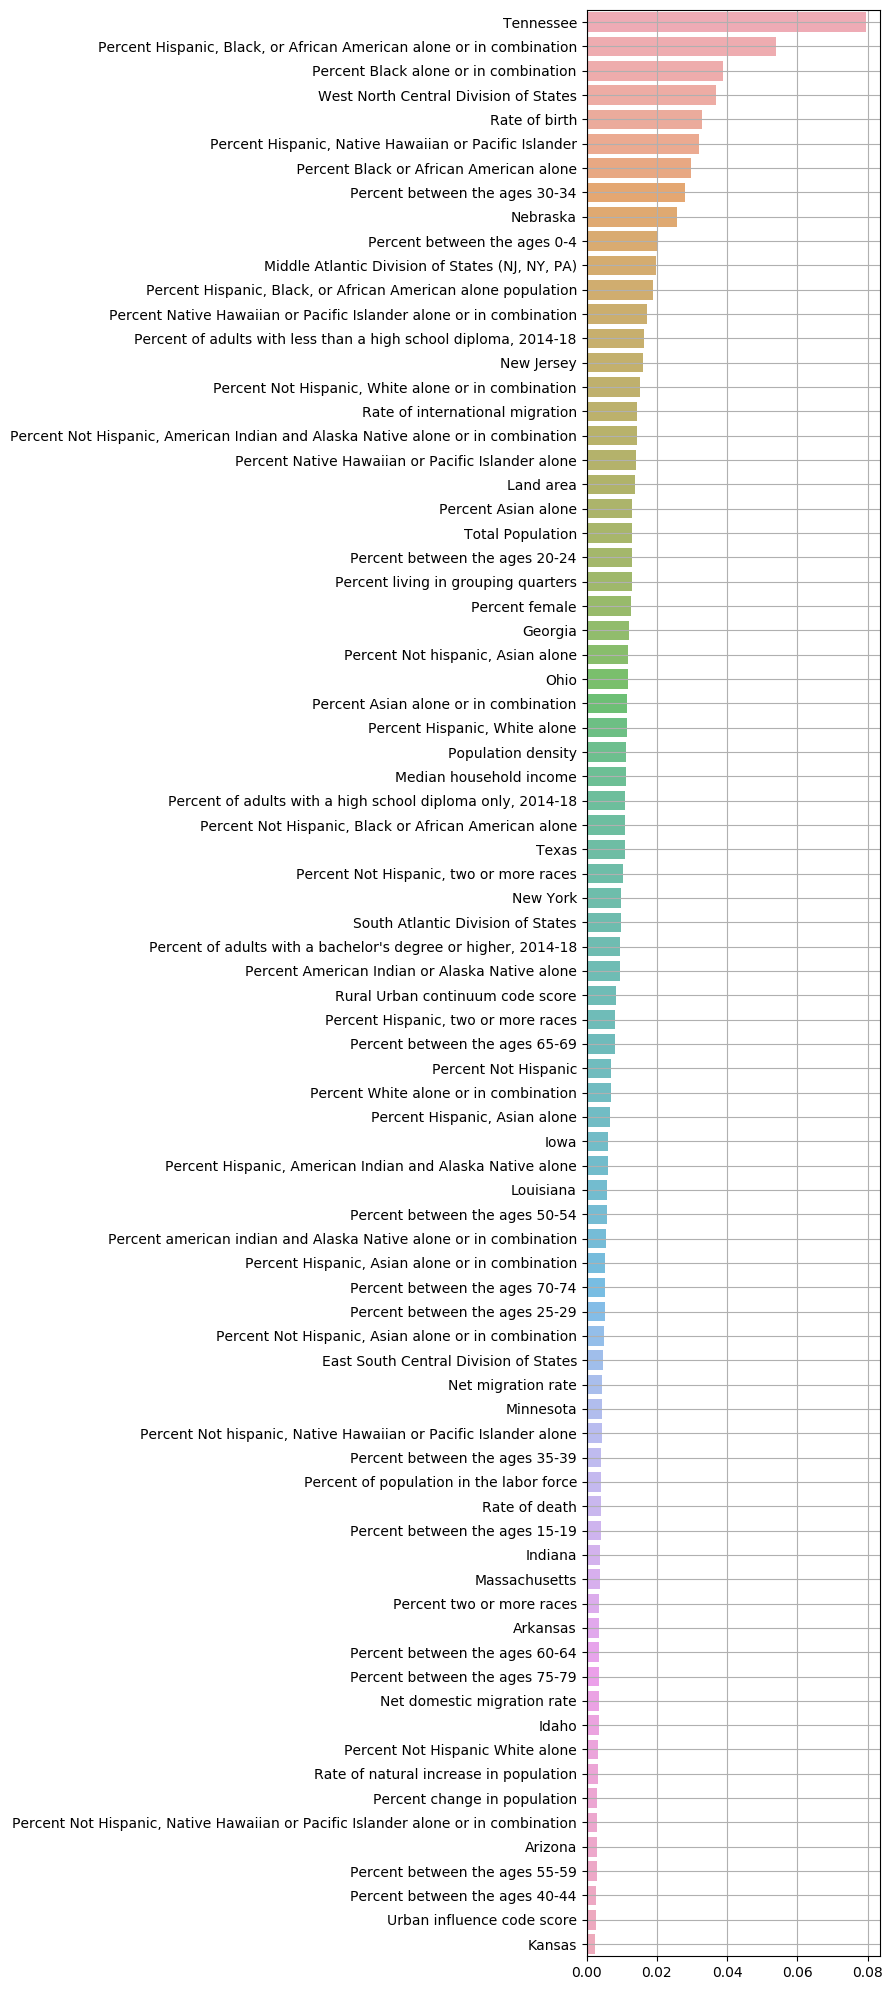

In [296]:
plot_features(80, features_all_mi)
plt.tight_layout()
plt.savefig('plots/xg_features.png', dpi=300)

In [185]:
df = pd.read_csv('../files/modeling_data/census_data_age_gend.csv')

In [186]:
df.columns

Index(['FIPS', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME', 'TOT_POP', 'TOT_MALE',
       'WA', 'BA', 'IA',
       ...
       'Metro_2013',
       'Percent of adults with less than a high school diploma, 2014-18',
       'Percent of adults with a high school diploma only, 2014-18',
       'Percent of adults completing some college or associate's degree, 2014-18',
       'Percent of adults with a bachelor's degree or higher, 2014-18',
       'LAND_AREA', 'DENSITY', 'med_age', 'per_dem', 'per_gop'],
      dtype='object', length=104)

In [187]:
dfcv = pd.read_csv('../files/covid_confirmed_usafacts.csv')

dates = dfcv.columns[4:]

changed_dates = {date: date.replace('/', '_') for date in dates}

dfcv = dfcv.rename(columns=changed_dates)

dfcv.countyFIPS = dfcv.countyFIPS.map(lambda x: '{:05d}'.format(x))

dfcv = dfcv.set_index('countyFIPS')

In [188]:
cases_date = '5_16_20'

In [189]:
df = pd.read_csv('../files/modeling_data/census_data.csv', index_col=0)

dft = pd.DataFrame(dfcv[cases_date])

df.index = df.index.map(lambda x: '{:05d}'.format(x))

df = df.join(dft)

df[cases_date] = 100_000 * df[cases_date] / df.TOT_POP

df.rename(columns={cases_date:'CPC'}, inplace = True)

df = df.reset_index()

df = df.rename(columns={'index':'FIPS'})

In [190]:
# Drop the District of Columbia
df = df.loc[df.STNAME != 'District of Columbia']

len(df.STNAME.unique())

50

In [191]:
df

FIPS  STATE  COUNTY   STNAME            CTYNAME  TOT_POP  TOT_MALE  \
0     01001      1       1  Alabama     Autauga County    55601  0.485513   
1     01003      1       3  Alabama     Baldwin County   218022  0.484616   
2     01005      1       5  Alabama     Barbour County    24881  0.527832   
3     01007      1       7  Alabama        Bibb County    22400  0.532188   
4     01009      1       9  Alabama      Blount County    57840  0.492739   
...     ...    ...     ...      ...                ...      ...       ...   
3136  56037     56      37  Wyoming  Sweetwater County    43051  0.514553   
3137  56039     56      39  Wyoming       Teton County    23081  0.515966   
3138  56041     56      41  Wyoming       Uinta County    20299  0.506675   
3139  56043     56      43  Wyoming    Washakie County     7885  0.505770   
3140  56045     56      45  Wyoming      Weston County     6967  0.529496   

      TOT_FEMALE        WA        BA  ...  Urban_influence_code_2013  \
0       0.514487  0.767252  0.196309  ...                        2.0   
1       0.515384  0.872852  0.089404  ...                        2.0   
2       0.472168  0.490696  0.483984  ...                        6.0   
3       0.467813  0.768348  0.212946  ...                        1.0   
4       0.507261  0.958783  0.016425  ...                        1.0   
...          ...       ...       ...  ...                        ...   
3136    0.485447  0.938352  0.013751  ...                        8.0   
3137    0.484034  0.951908  0.007582  ...                        8.0   
3138    0.493325  0.953545  0.008276  ...                        8.0   
3139    0.494230  0.944832  0.005073  ...                       11.0   
3140    0.470504  0.930817  0.006890  ...                        9.0   

      Metro_2013  \
0            1.0   
1            1.0   
2            0.0   
3            1.0   
4            1.0   
...          ...   
3136         0.0   
3137         0.0   
3138         0.0   
3139         0.0   
3140         0.0   

      Percent of adults with less than a high school diploma, 2014-18  \
0                                                  11.3                 
1                                                   9.7                 
2                                                  27.0                 
3                                                  16.8                 
4                                                  19.8                 
...                                                 ...                 
3136                                                9.0                 
3137                                                5.6                 
3138                                                7.2                 
3139                                               10.4                 
3140                                                7.8                 

      Percent of adults with a high school diploma only, 2014-18  \
0                                                  32.6            
1                                                  27.6            
2                                                  35.7            
3                                                  47.3            
4                                                  34.0            
...                                                 ...            
3136                                               33.3            
3137                                               13.2            
3138                                               40.1            
3139                                               30.3            
3140                                               35.8            

      Percent of adults completing some college or associate's degree, 2014-18  \
0                                                  28.4                          
1                                                  31.3                          
2                                   

In [192]:
df.to_csv('public_data/modeling_data.csv')

In [157]:
# dfresid.fips = dfresid.fips.map(lambda x: '{:05d}'.format(x))

In [158]:
df.set_index('FIPS')[['CPC']].join(dfresid.set_index('fips'
                                )).to_csv('public_data/both_residuals.csv')

In [159]:
df = df.set_index('FIPS')[['CPC']].join(dfresid.set_index('fips'))

In [160]:
df['abs_xgb_residual'] = abs(df.xgb_residual)

In [162]:
df.sort_values(by='abs_xgb_residual')[-30:]

CPC  xgb_residual                   county_state  \
FIPS                                                               
13243   2473.291380     1726.6566       Randolph County, Georgia   
51001   2060.965075     1740.8596      Accomack County, Virginia   
20057   3833.215297     1762.0603            Ford County, Kansas   
13273   2310.997561     1787.2059        Terrell County, Georgia   
36087   3895.669261     1796.1003      Rockland County, New York   
19115   2739.726027     1821.1428            Louisa County, Iowa   
13259    596.870463    -1838.7804        Stewart County, Georgia   
30077      0.000000    -1850.9277         Powell County, Montana   
13099   2273.836245     1863.8792          Early County, Georgia   
19171   2094.178893     1864.4587              Tama County, Iowa   
28055      0.000000    -1878.0107  Issaquena County, Mississippi   
51683   1378.449125    -1881.2621        Manassas city, Virginia   
16013   2247.688155     1989.9297           Blaine County, Idaho   
13309     88.843762    -1994.8770        Wheeler County, Georgia   
51159   2257.136535     1999.1881      Richmond County, Virginia   
08075   2252.879970     2023.8667         Logan County, Colorado   
35031   2471.987827     2026.7646    McKinley County, New Mexico   
51029   2417.789282     2041.0880    Buckingham County, Virginia   
02185      0.000000    -2378.6846    North Slope Borough, Alaska   
51081    430.033543    -2412.2053   Greensville County, Virginia   
39129   3462.107909     3266.0771          Pickaway County, Ohio   
47095   5410.875725     3564.0757         Lake County, Tennessee   
39101   3752.911610     3586.5450            Marion County, Ohio   
18017   4091.687525     3640.2520           Cass County, Indiana   
47007   4113.859709     3945.3655      Bledsoe County, Tennessee   
42053     96.167056    -3950.6626    Forest County, Pennsylvania   
27105   6171.319102     4404.3850       Nobles County, Minnesota   
31043   7239.954190     5463.4950        Dakota County, Nebraska   
05079   7135.918703     6387.9556       Lincoln County, Arkansas   
47169  12549.945514    11796.3510    Trousdale County, Tennessee   

       xgb_median_residual  abs_xgb_residual  
FIPS                                          
13243          2053.467970         1726.6566  
51001          1854.406317         1740.8596  
20057          2751.131779         1762.0603  
13273          2002.595711         1787.2059  
36087          2799.378761         1796.1003  
19115          2233.928394         1821.1428  
13259          -667.460988         1838.7804  
30077          -971.988345         1850.9277  
13099          2022.351702         1863.8792  
19171          1932.812776         1864.4587  
28055          -985.529845         1878.0107  
51683          -297.912508         1881.2621  
16013          2072.302908         1989.9297  
13309          -999.541114         1994.8770  
51159          2081.656297         1999.1881  
08075          2091.867315         2023.8667  
35031          2202.870193         2026.7646  
51029          2182.932621         2041.0880  
02185         -1235.866795         2378.6846  
51081         -1037.591899         2412.2053  
39129          3317.586485         3266.0771  
47095          4440.969693         3564.0757  
39101          3623.222285         3586.5450  
18017          3819.463742         3640.2520  
47007          3983.106584         3945.3655  
42053         -1973.753792         3950.6626  
27105          5241.346031         4404.3850  
31043          6305.218575         5463.4950  
05079          6715.431131         6387.9556  
47169         12126.642237        11796.3510

### One hot encode

In [259]:
sorted_states = sorted(df.STNAME.unique().tolist())
assert len(sorted_states) == 50
sorted_states_dict = {i:sorted_states[i] for i in range(len(sorted_states))}

In [260]:
one_hot_columns = ['STNAME', 'DIVISION']

In [262]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and apply one hot transformation
OH = pd.DataFrame(OH_encoder.fit_transform(pd.DataFrame(df[one_hot_columns])))

# One-hot encoding removed index; put it back
OH.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
df = df.drop(one_hot_columns, axis=1)

# Add one-hot encoded columns to numerical features
df = pd.concat([df, OH], axis=1)

In [268]:
df.rename(columns=sorted_states_dict, inplace=True)

In [266]:
dont_use = ['FIPS', 'COUNTY', 'CTYNAME', 'STATE', 'REGION']

df = df.drop(dont_use, axis=1)

In [275]:
col_list = df.columns.tolist()
col_list.remove('CPC')

In [280]:
df.TOT_POP = df.TOT_POP.astype('float64')

In [281]:
import scipy.stats as st

In [333]:
def plot_r2(dataframe, col, y):
    x = dataframe[col]
    plt.grid(alpha=0.4)
    plt.scatter(x, y, alpha=0.1, edgecolors=None, s=8)
    p = st.pearsonr(x, y)[1]
    if p < 0.00001:
        p_str = 'p < 0.00001'
    else:
        p_str = '$p =$ {:.5f}'.format(p)
    r2 = '$r$ = {:.3f}, '.format(st.pearsonr(x, y)[0]) + p_str
    plt.title(r2)
    if col in ['TOT_POP', 'DENSITY', 'LAND_AREA']:
        plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0.1, 10_000)
#     plt.xlim(0.1, 10_000)
#     plt.xticks([0.1, 1, 10, 100, 1000, 10_000], 
#                ['0.1', '1', '10', '100', '1,000', '10,000'])
    plt.yticks([0.1, 1, 10, 100, 1000, 10_000], 
               ['0.1', '1', '10', '100', '1,000', '10,000'])
    plt.xlabel(features.get(str(col), col))
    plt.ylabel('COVID-19 Cases per 100,000')
    plt.tight_layout()

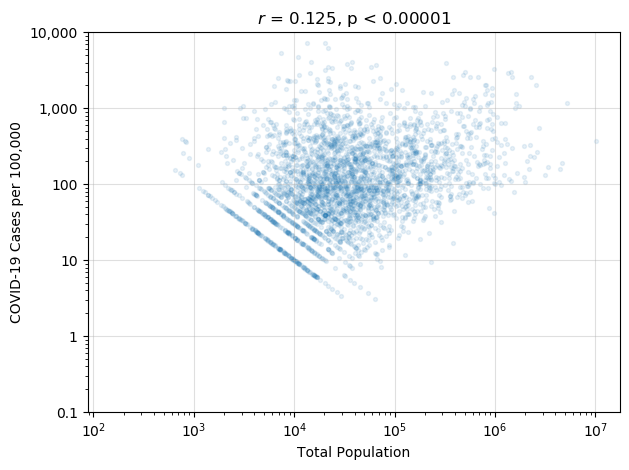

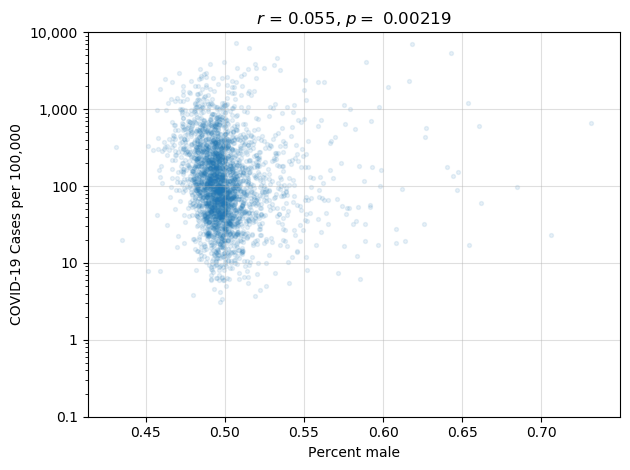

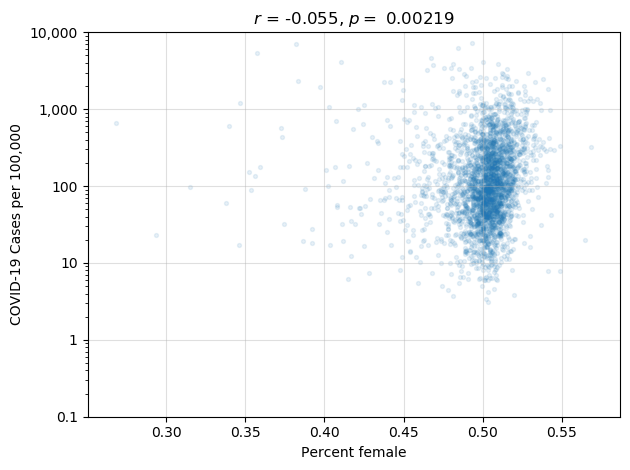

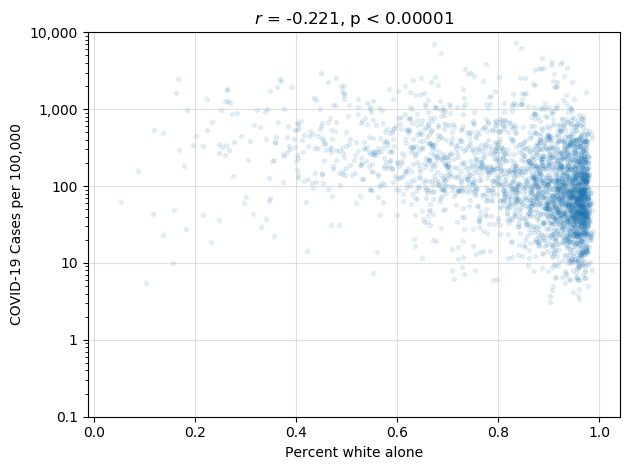

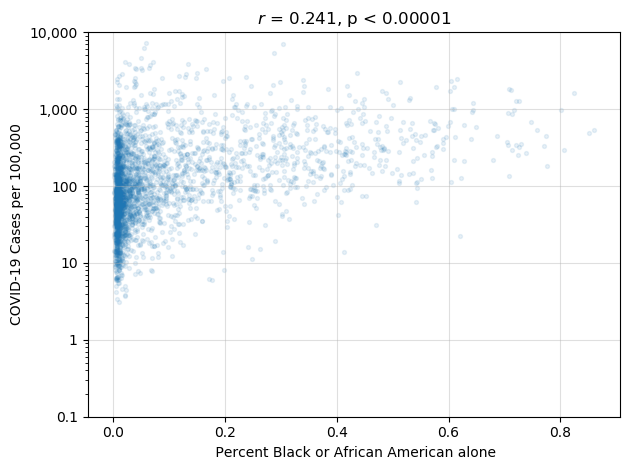

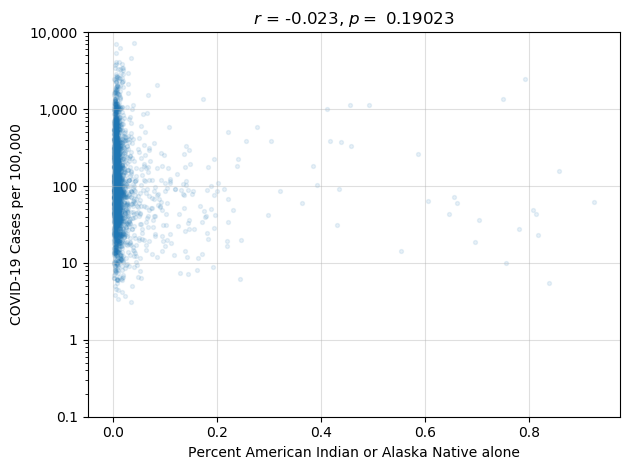

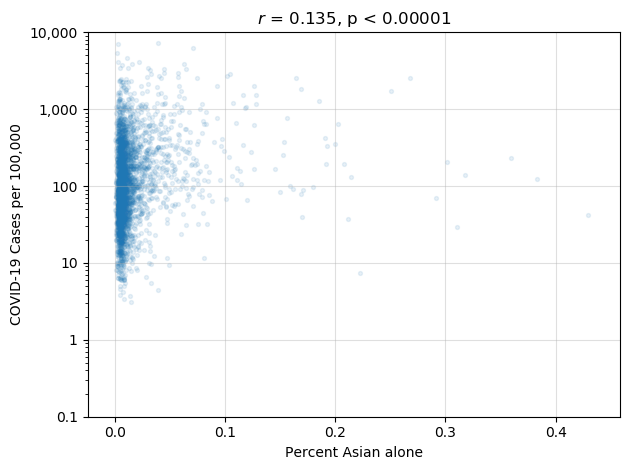

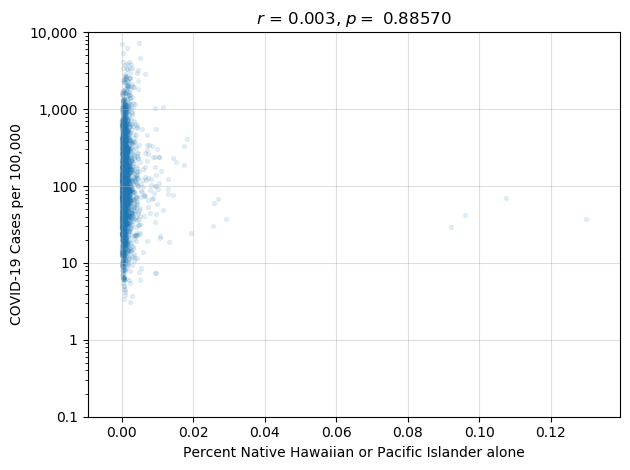

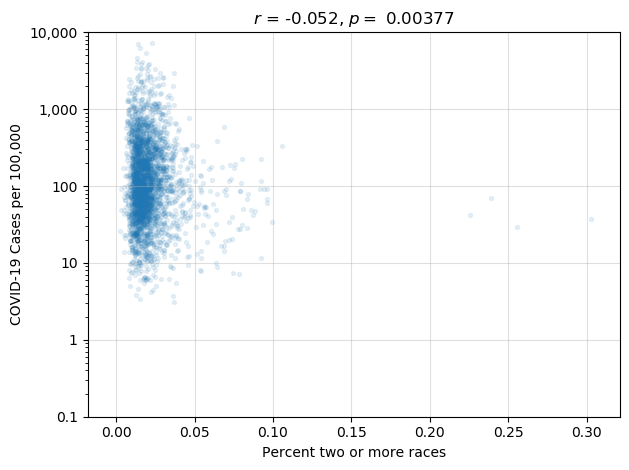

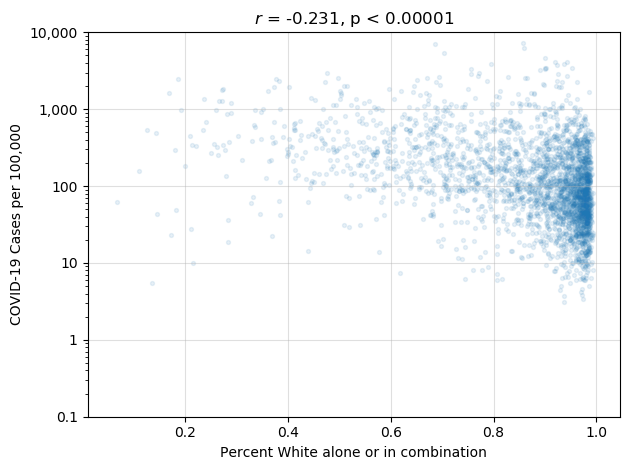

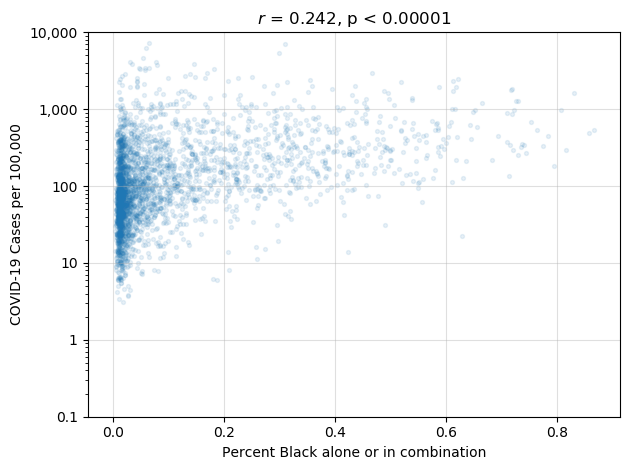

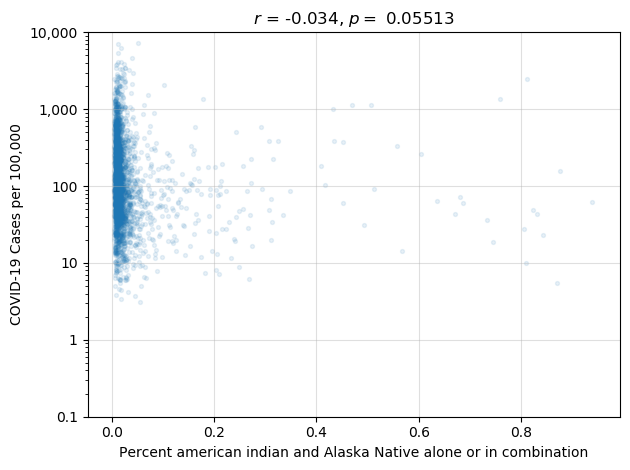

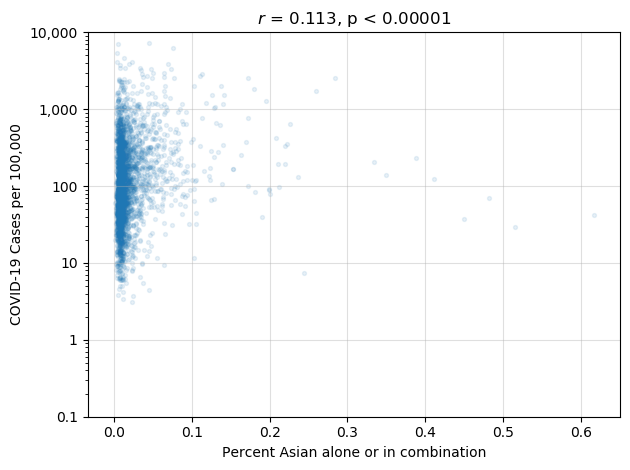

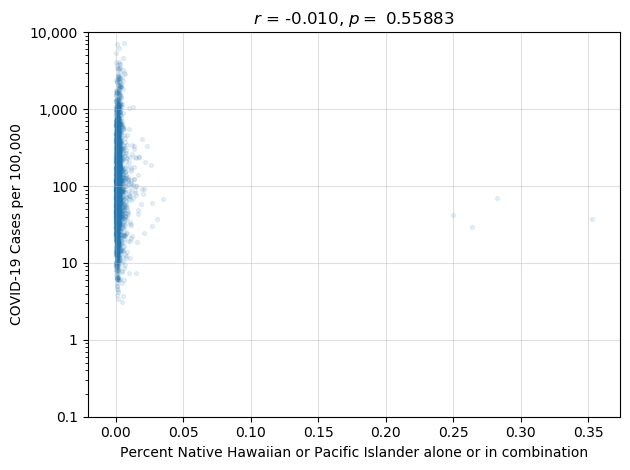

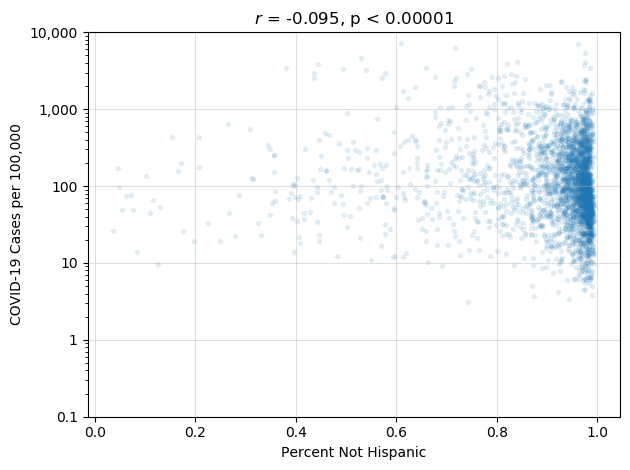

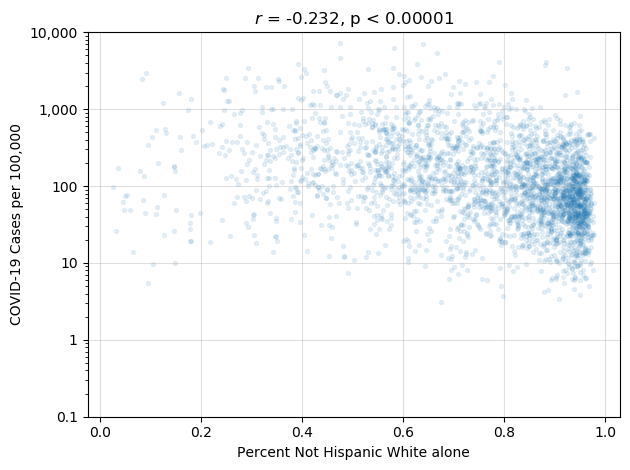

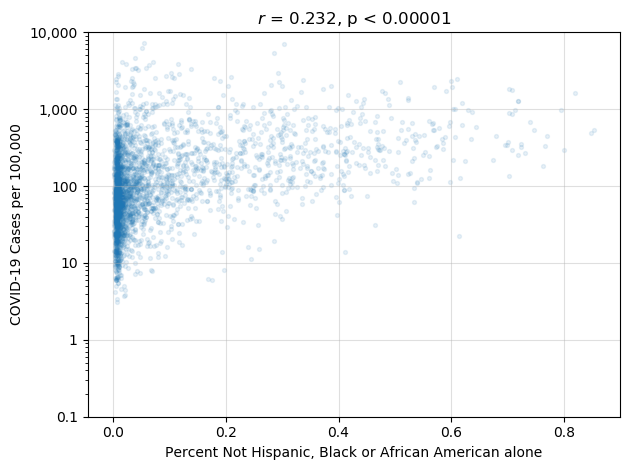

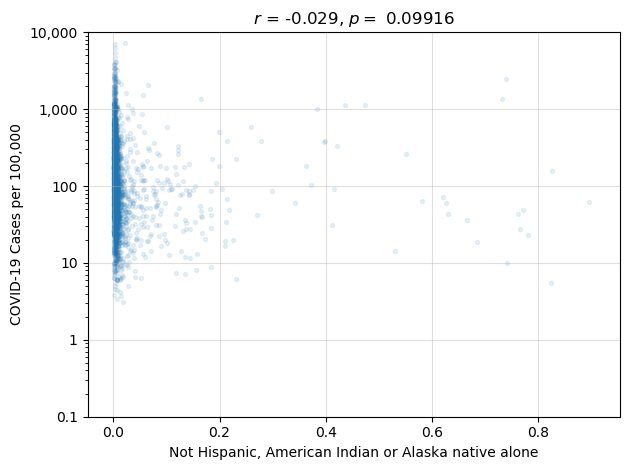

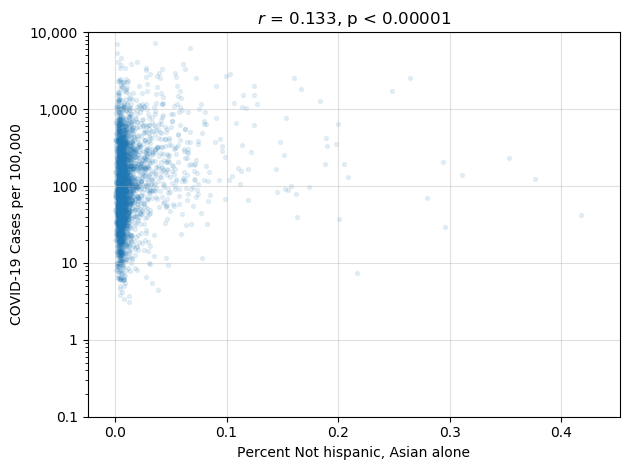

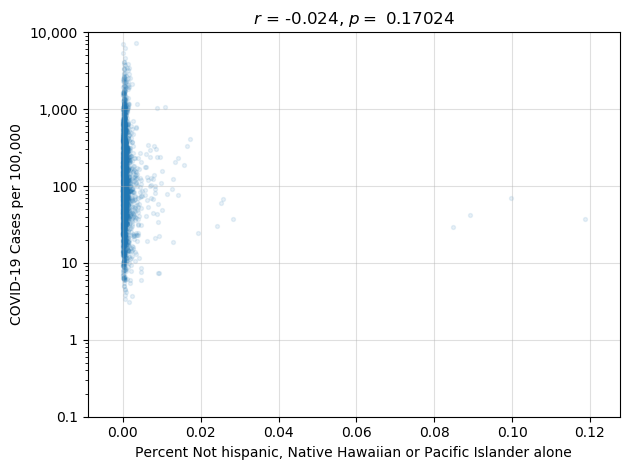

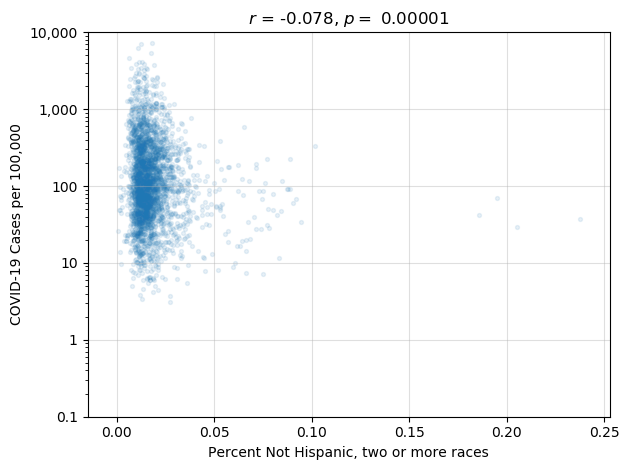

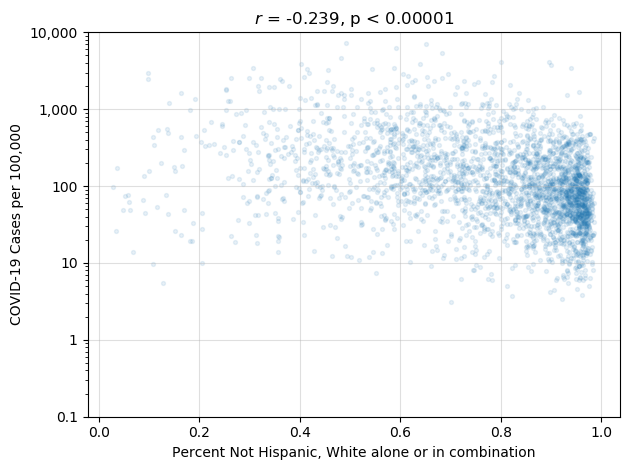

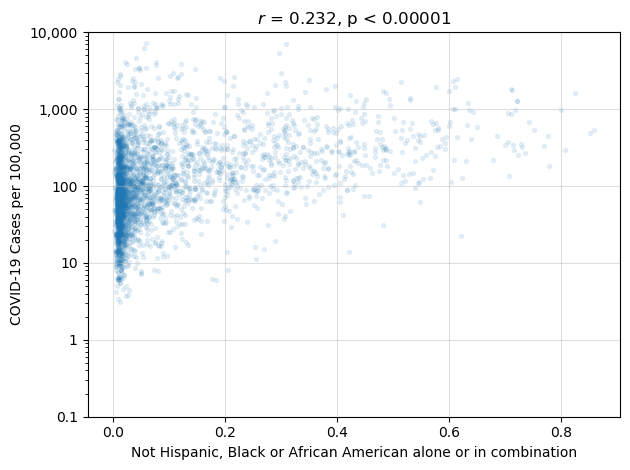

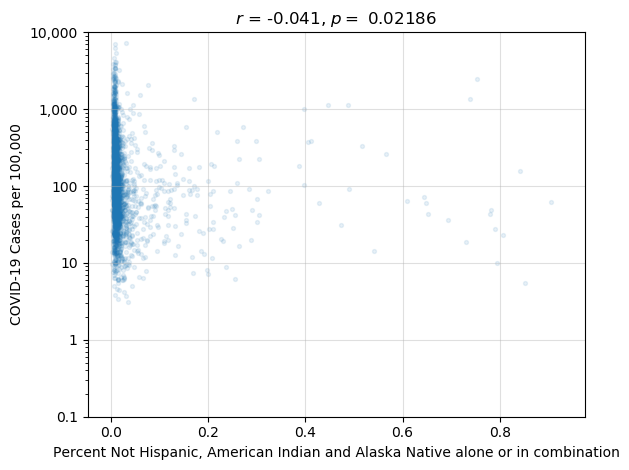

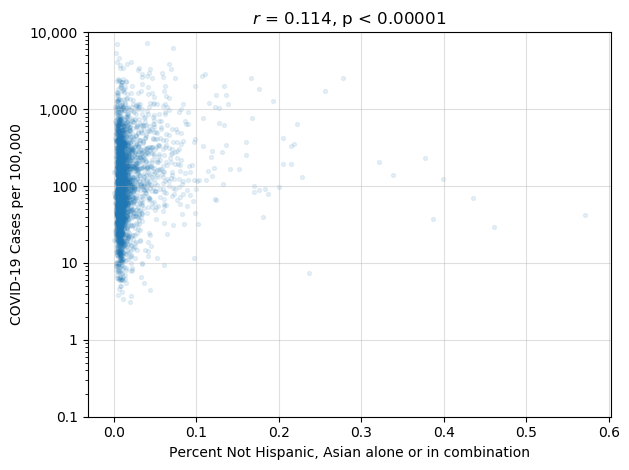

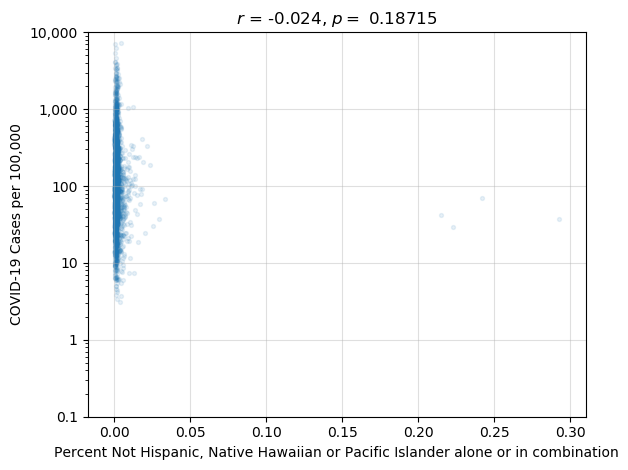

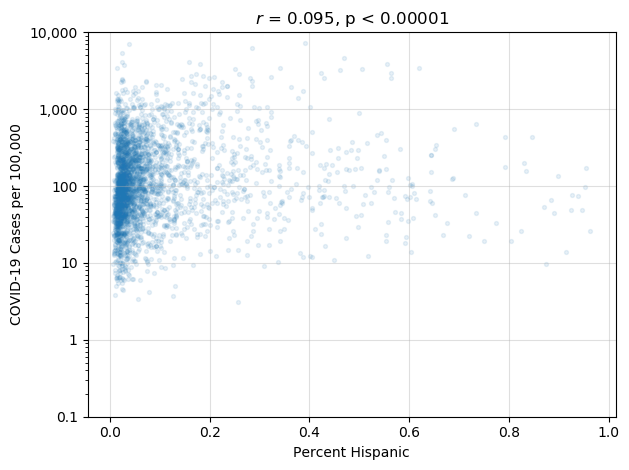

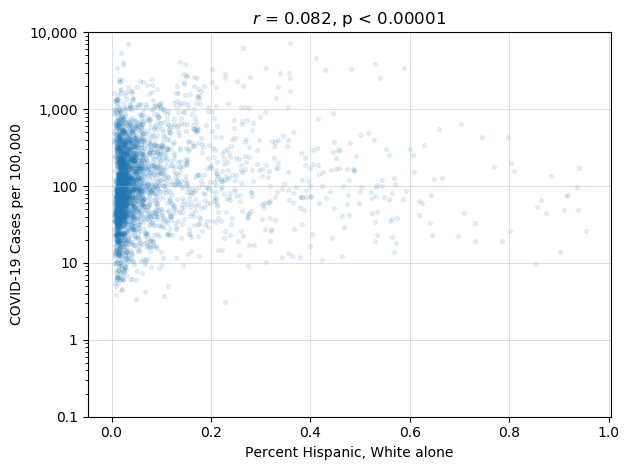

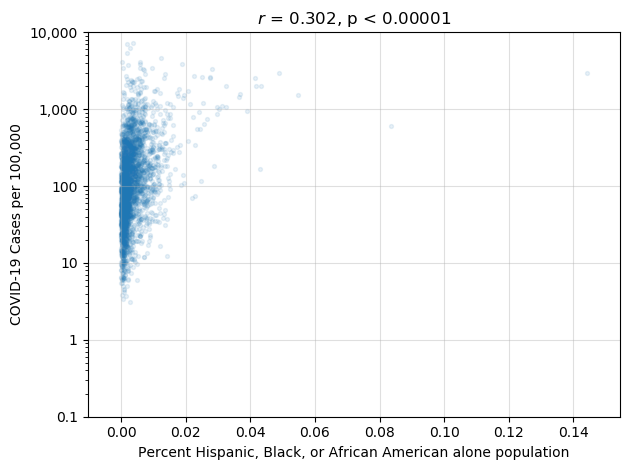

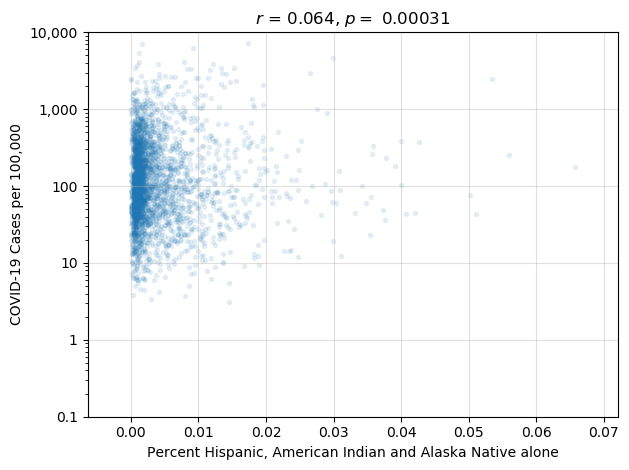

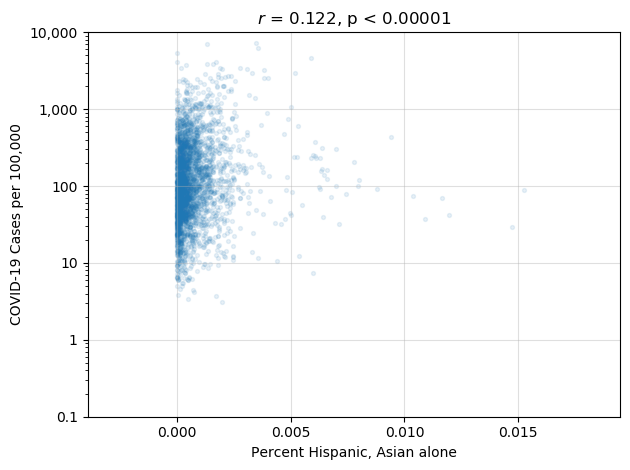

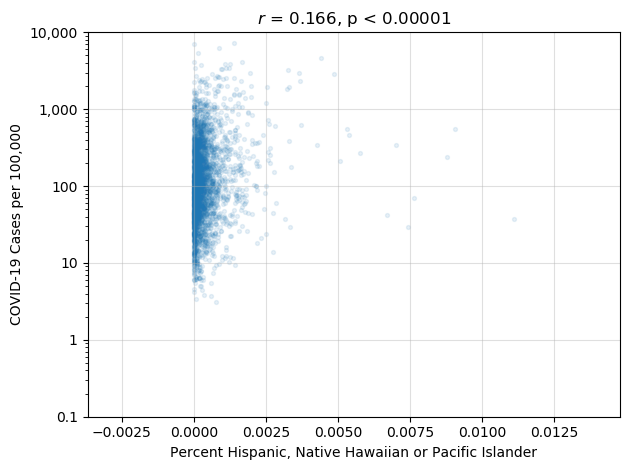

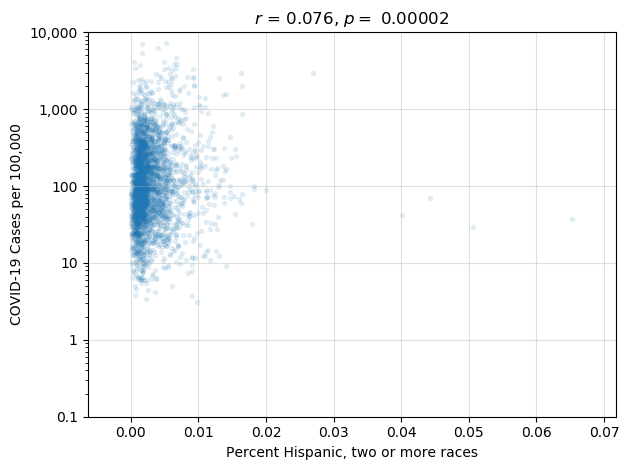

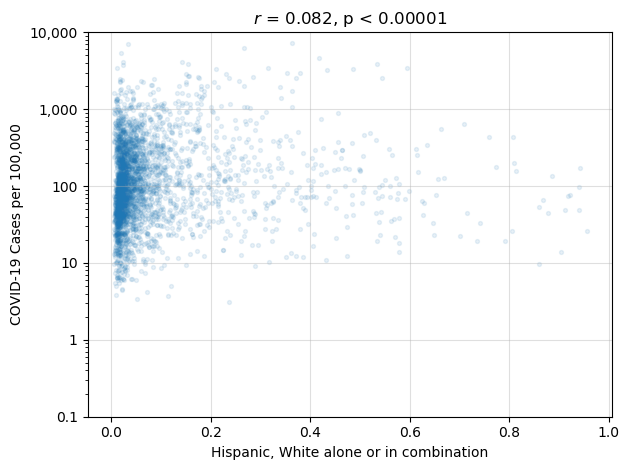

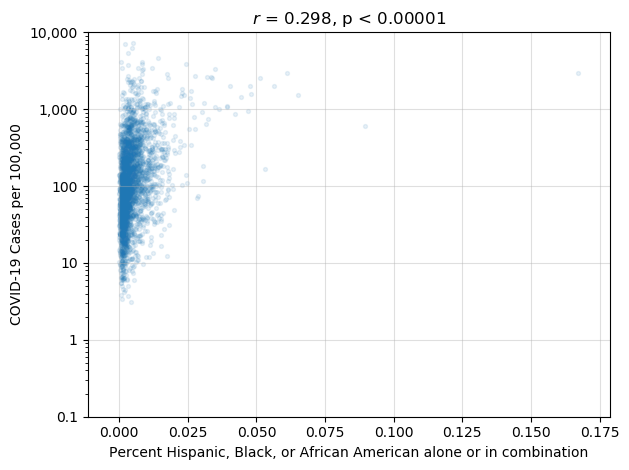

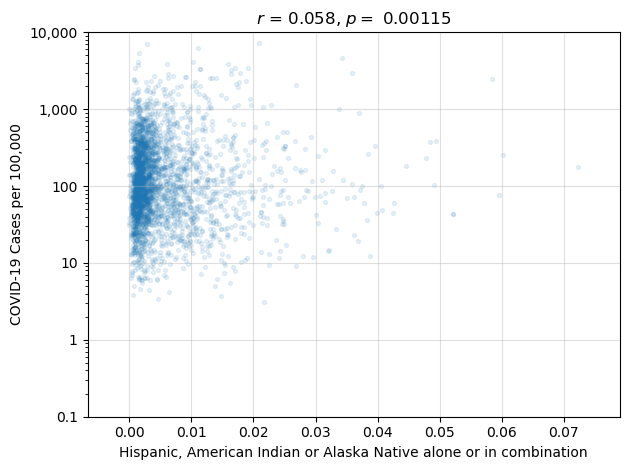

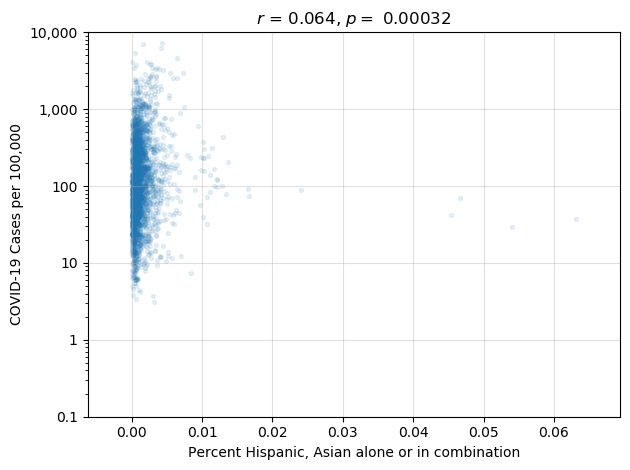

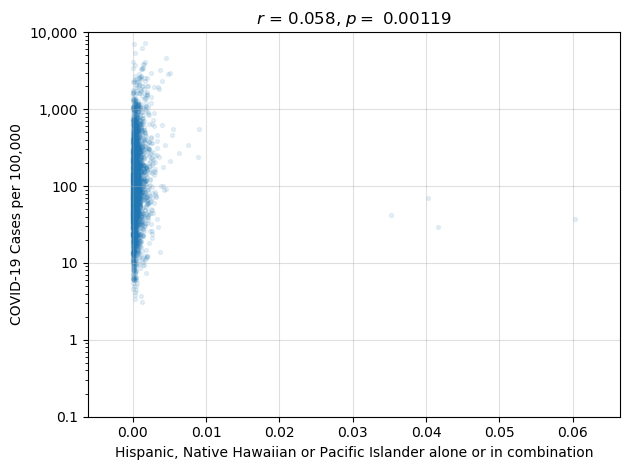

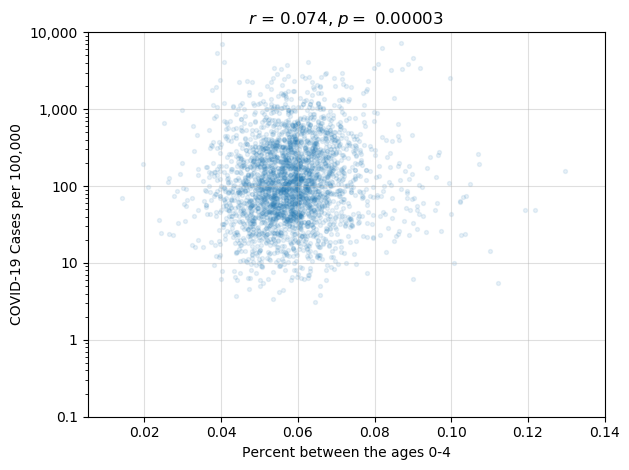

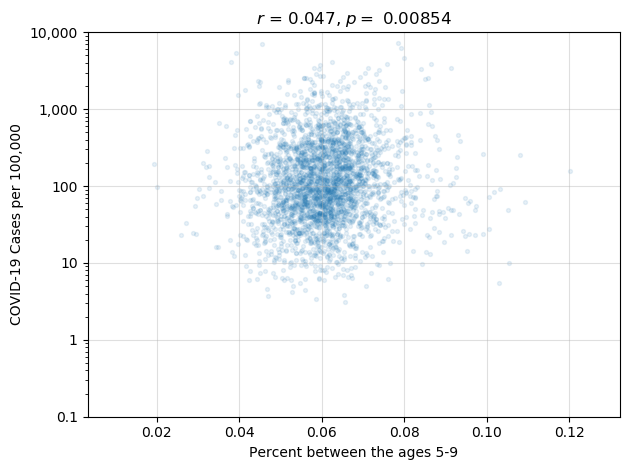

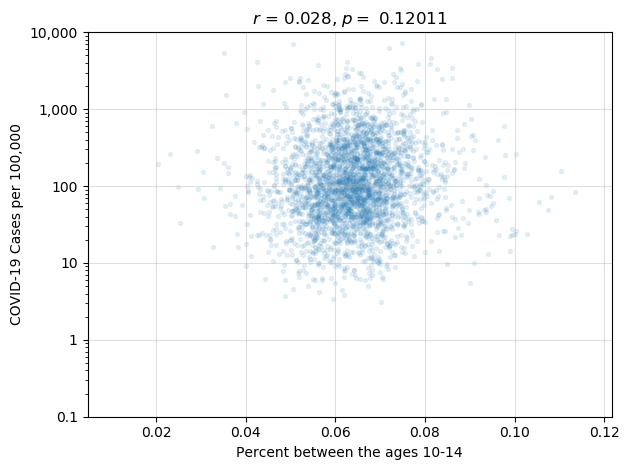

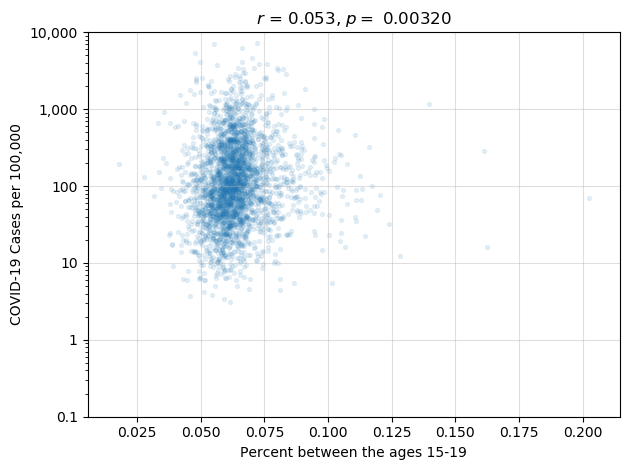

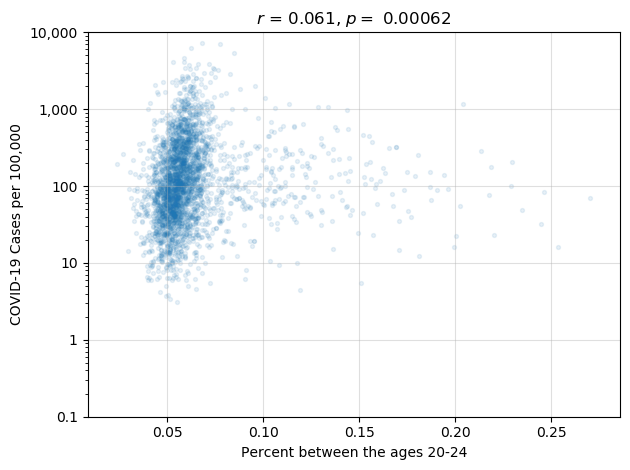

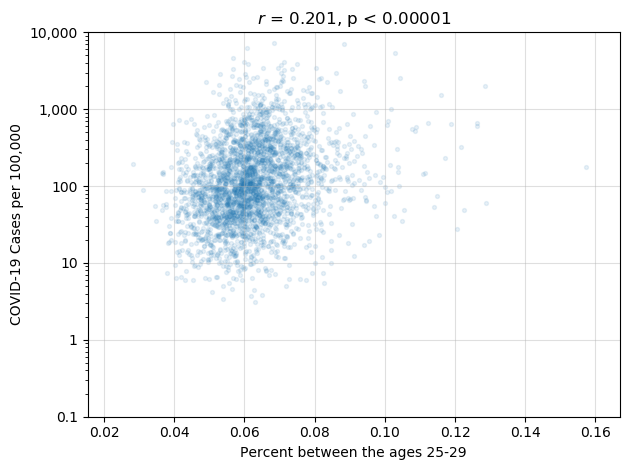

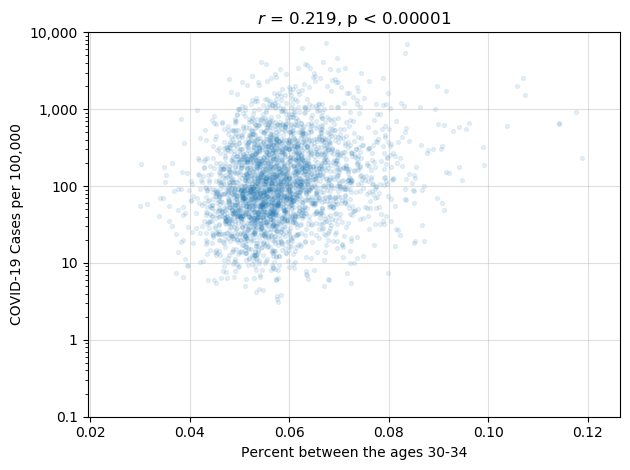

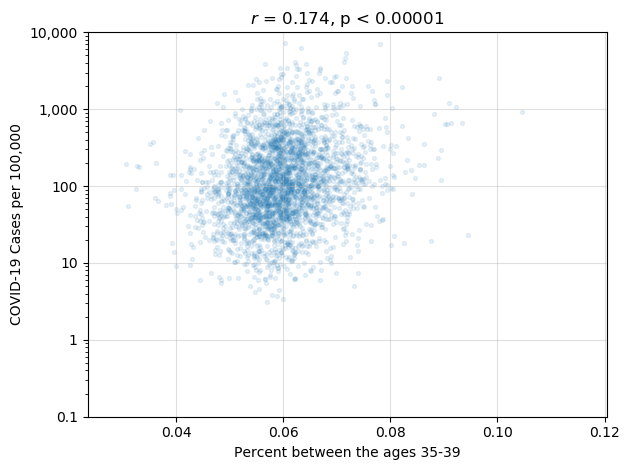

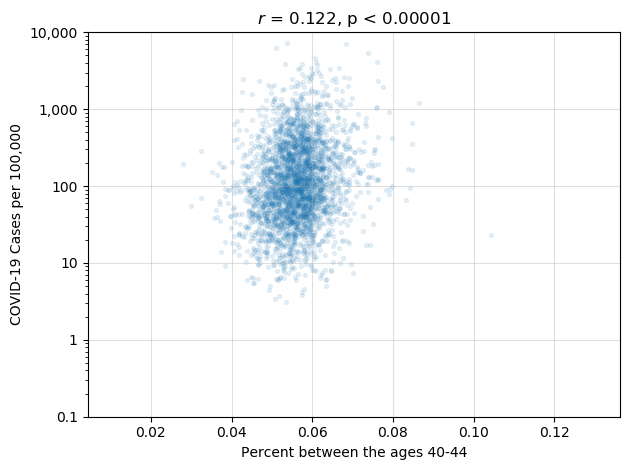

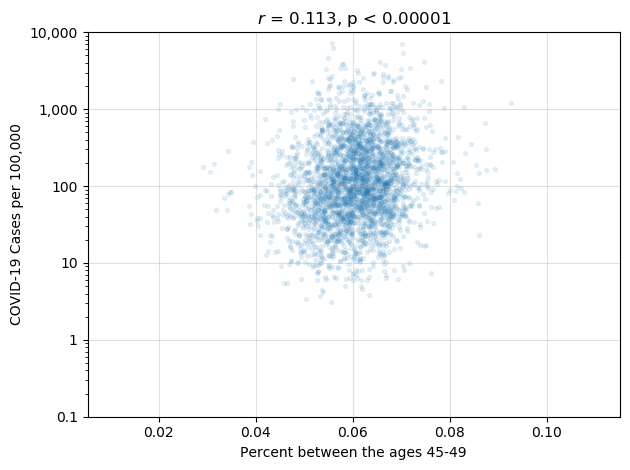

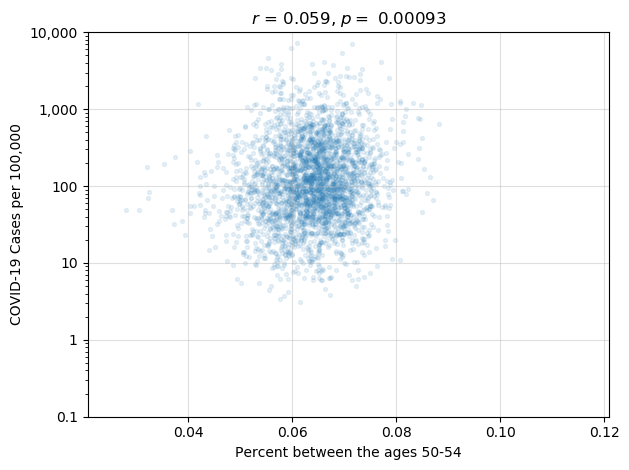

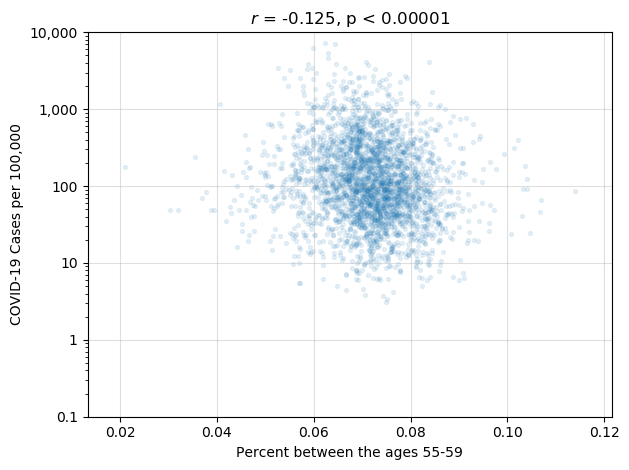

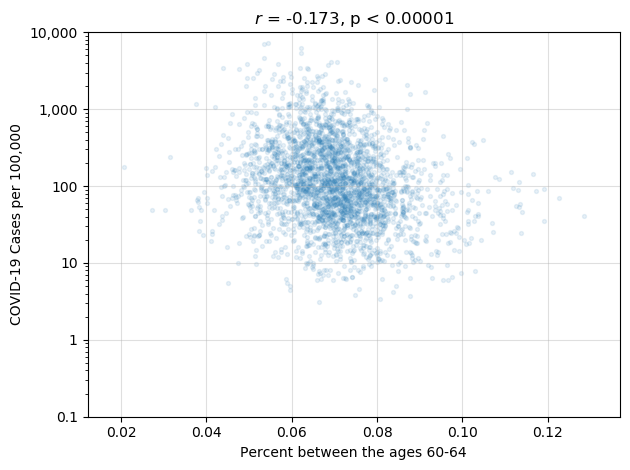

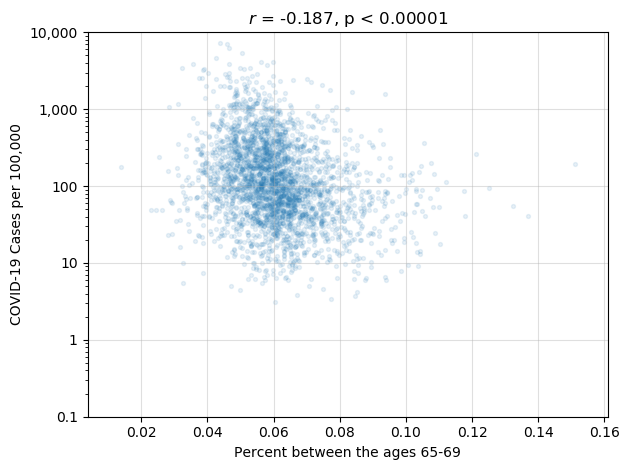

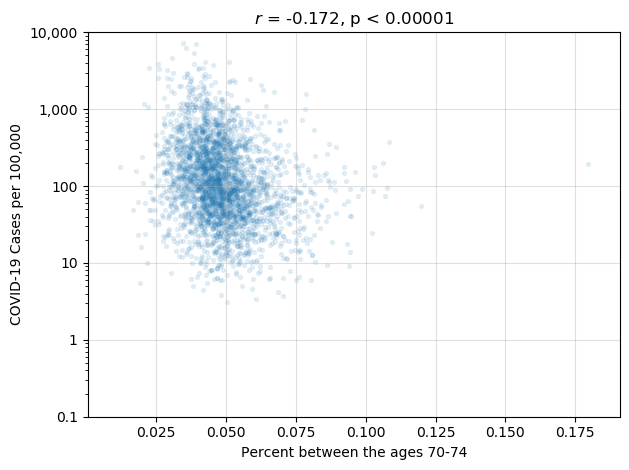

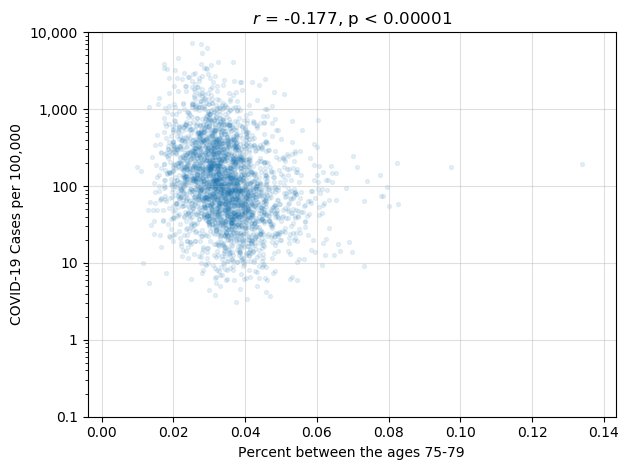

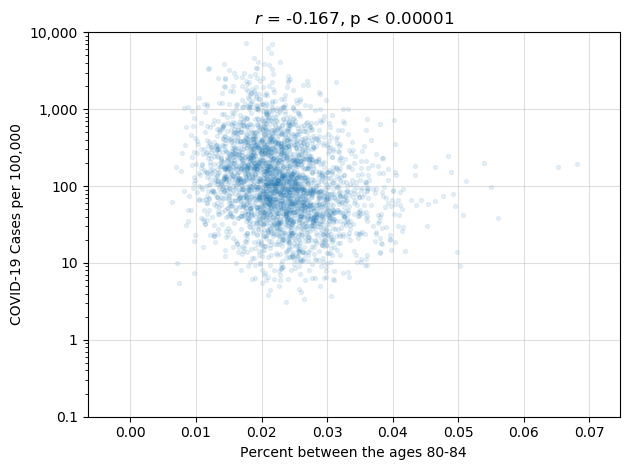

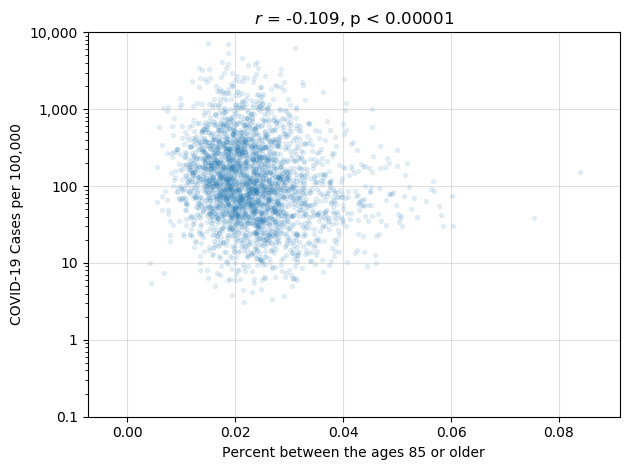

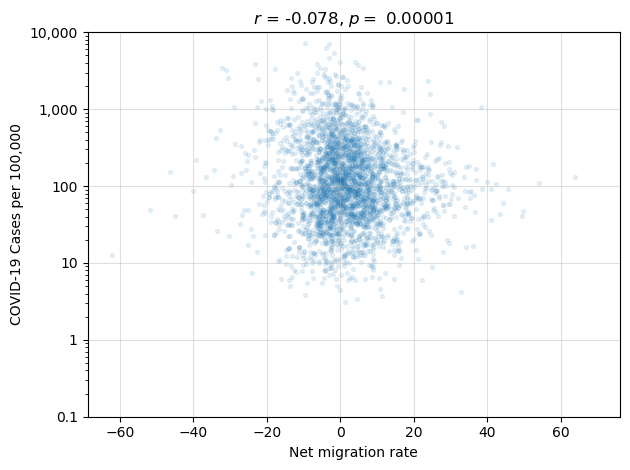

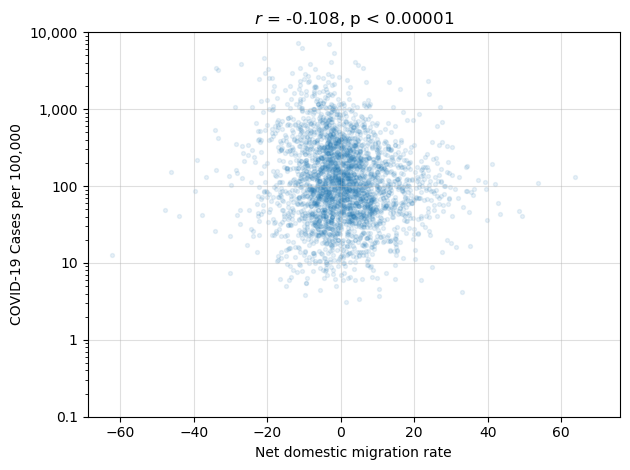

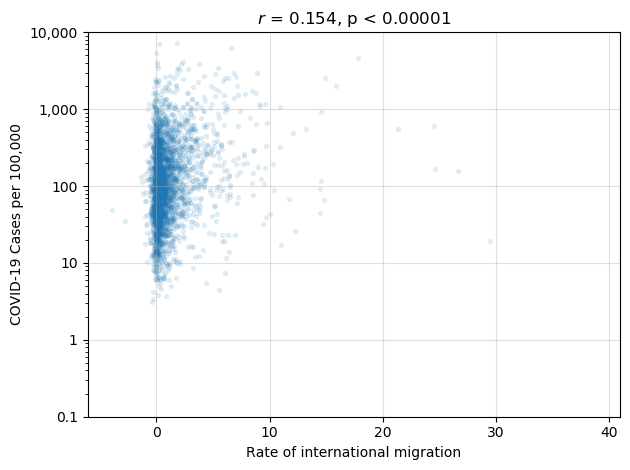

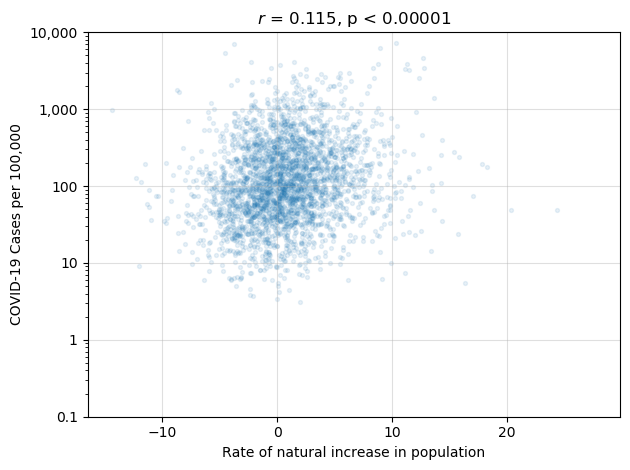

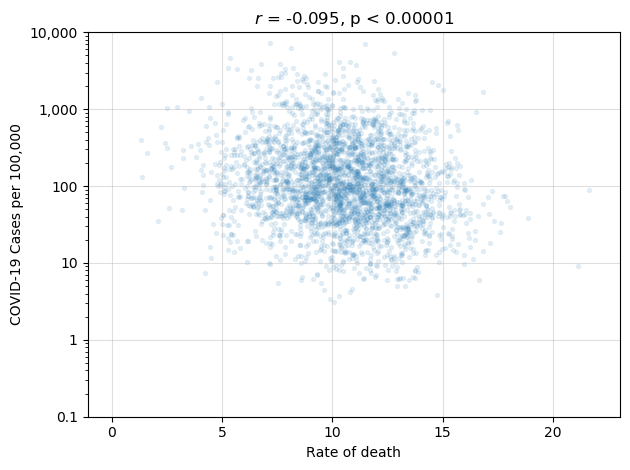

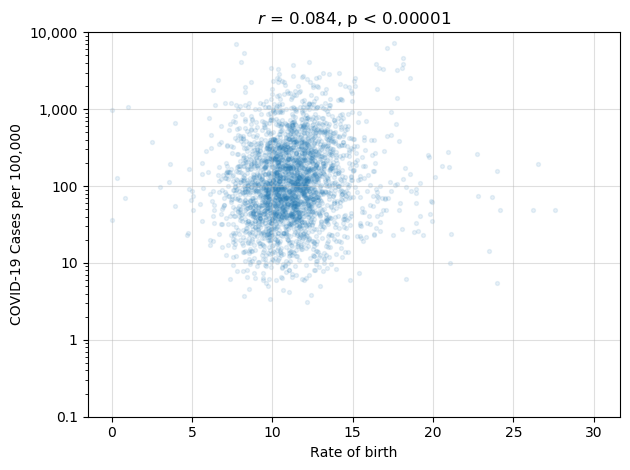

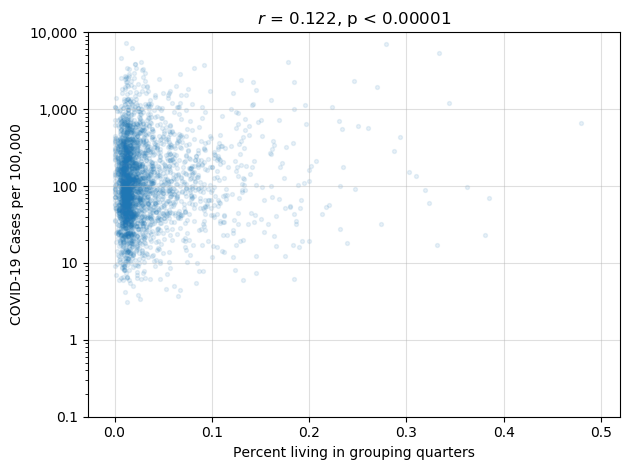

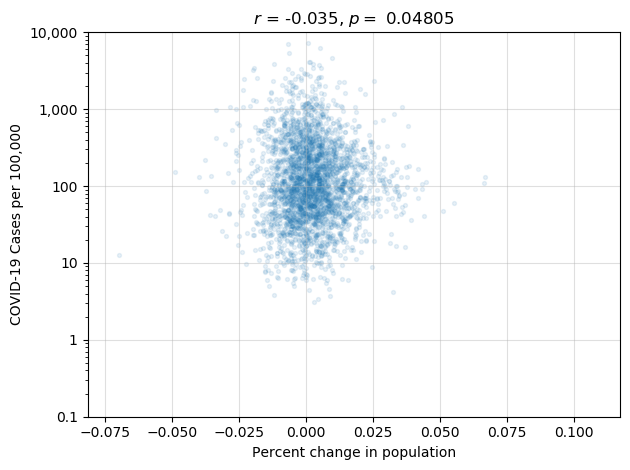

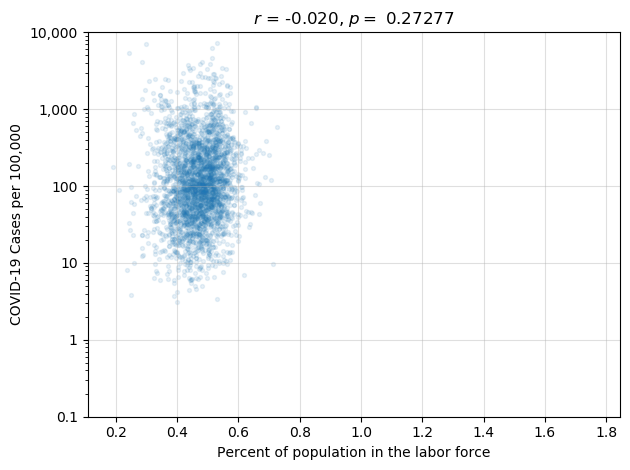

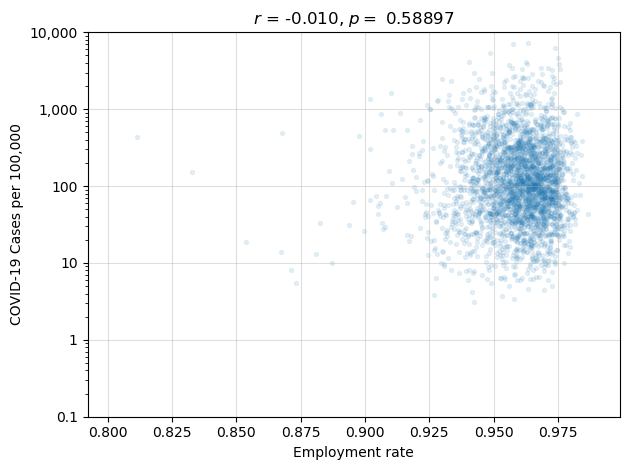

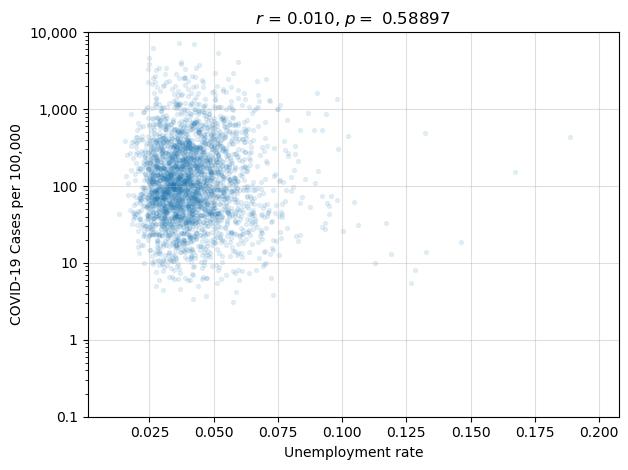

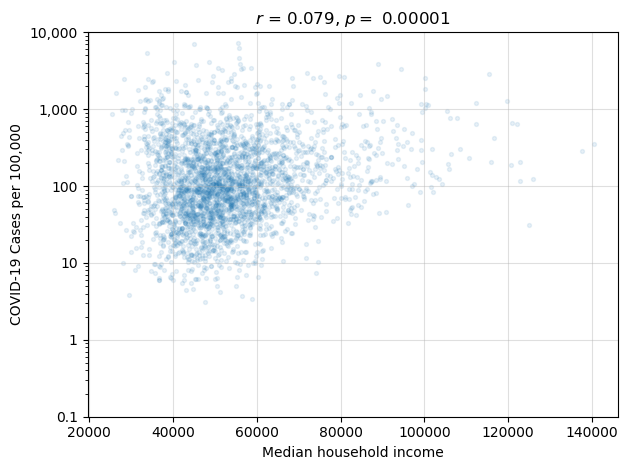

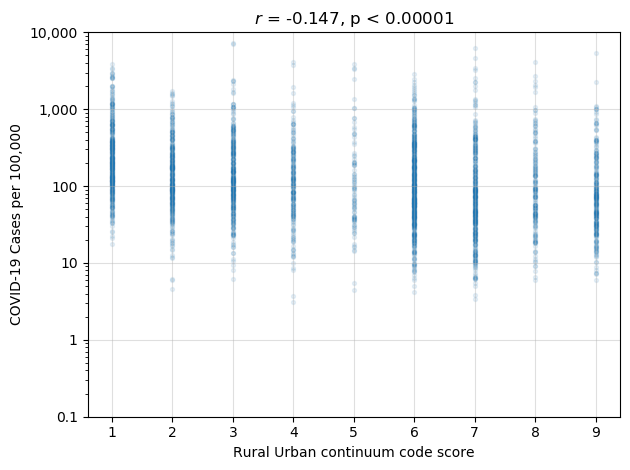

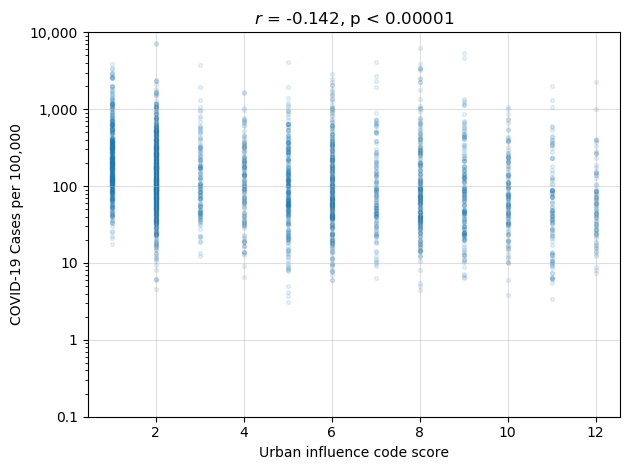

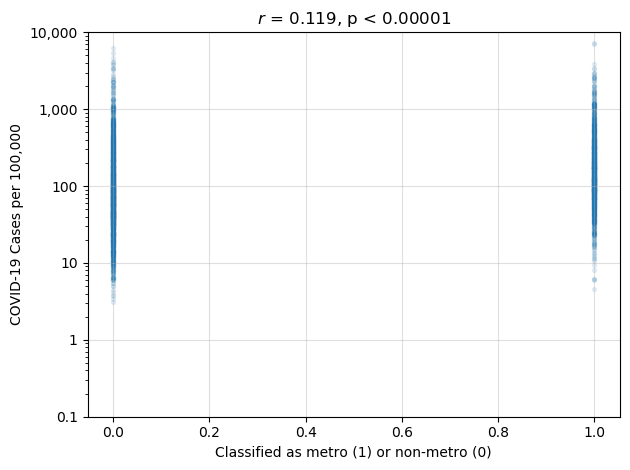

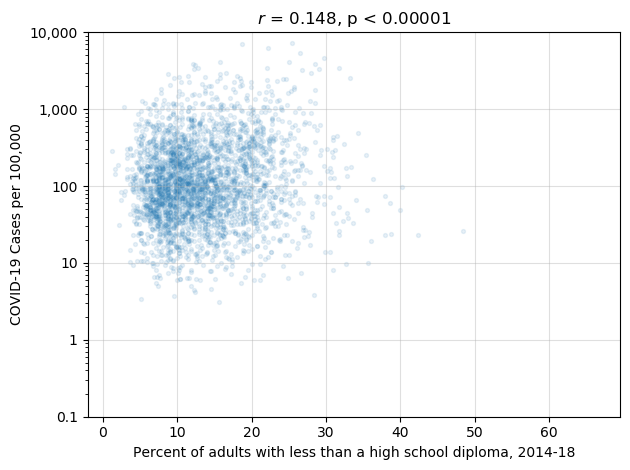

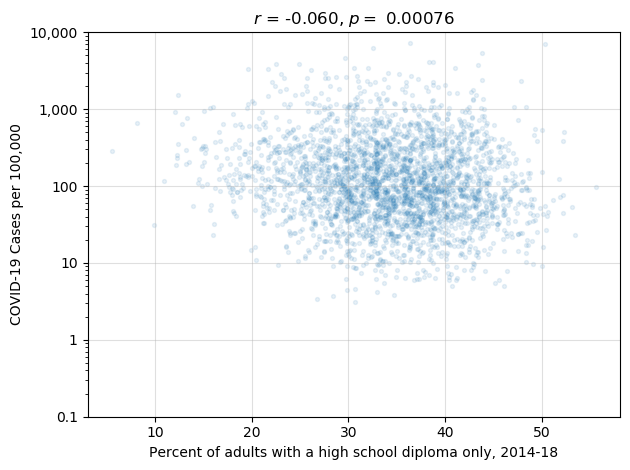

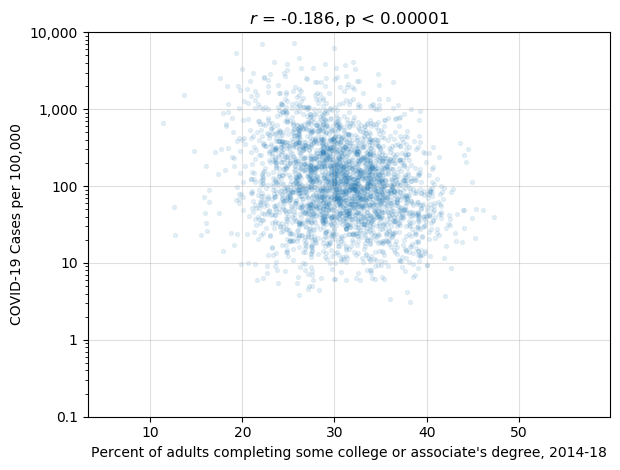

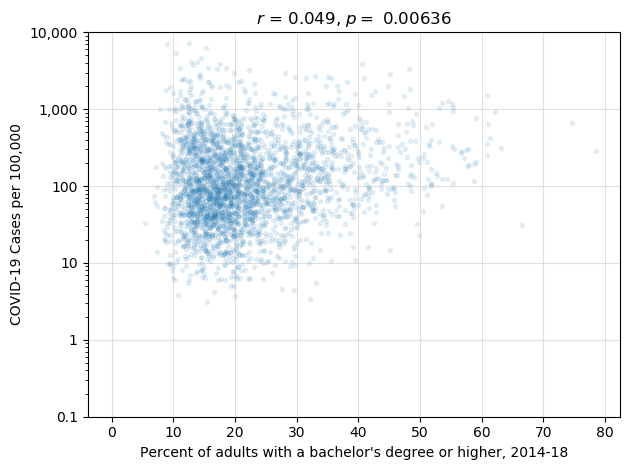

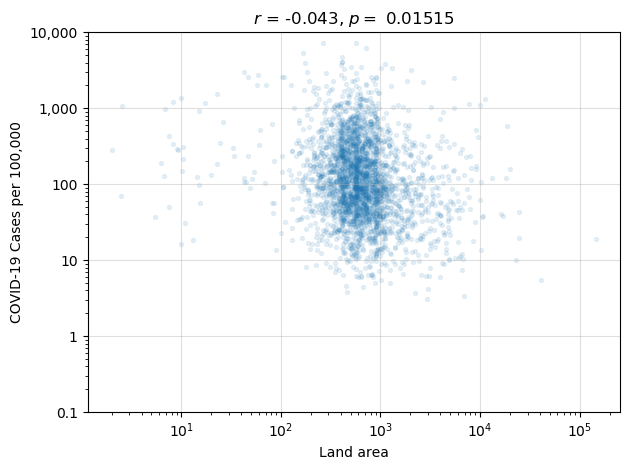

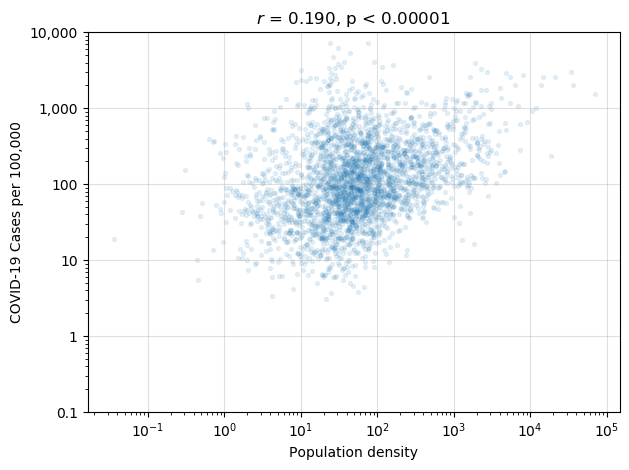

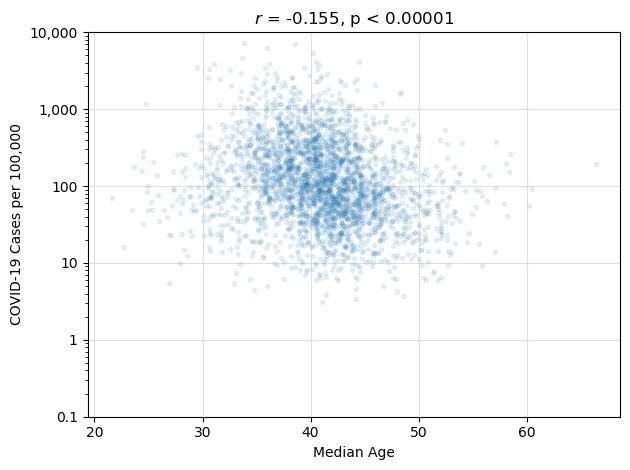

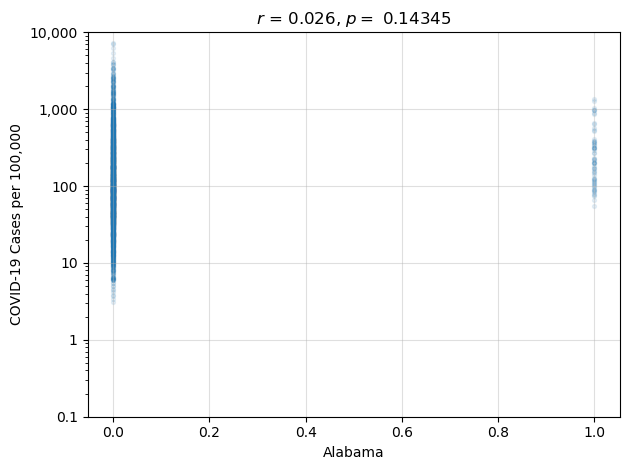

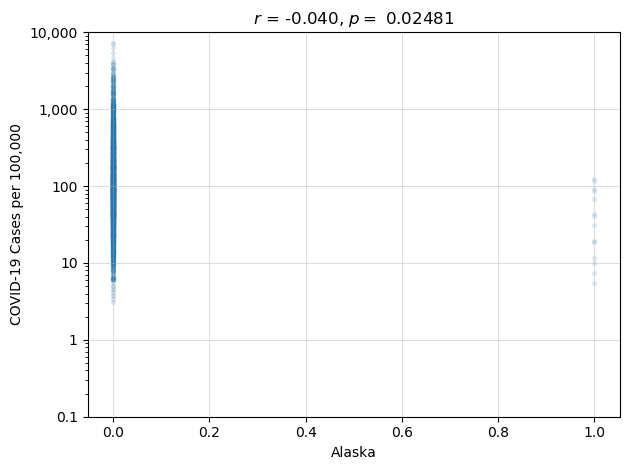

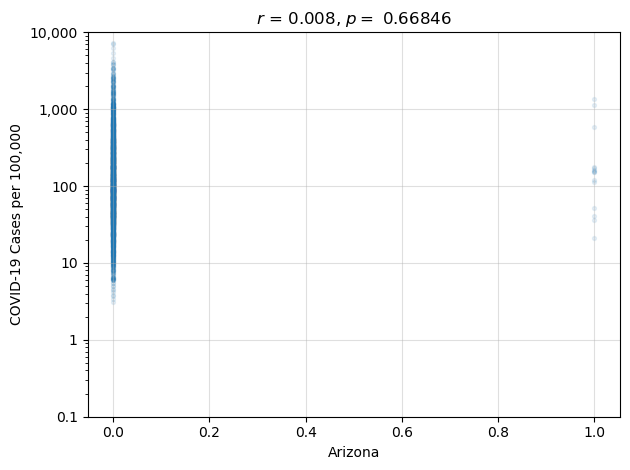

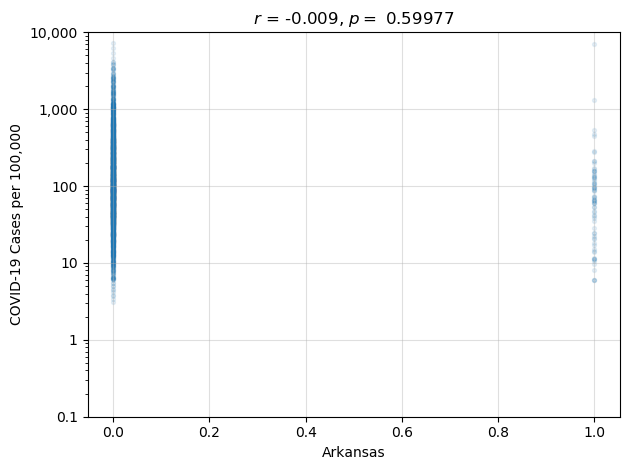

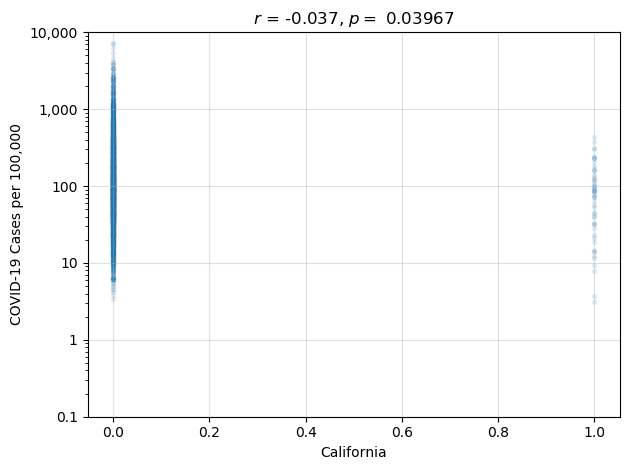

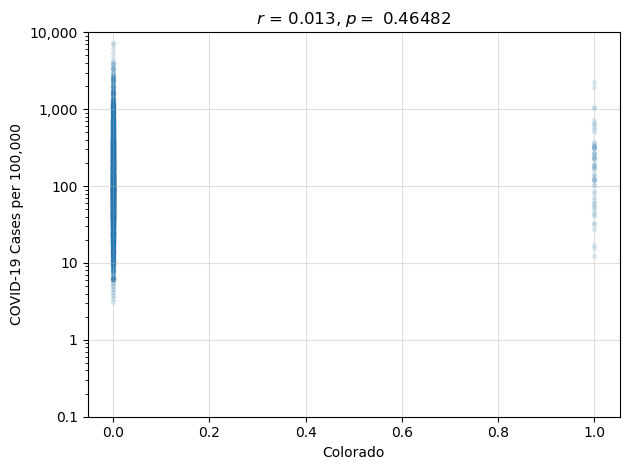

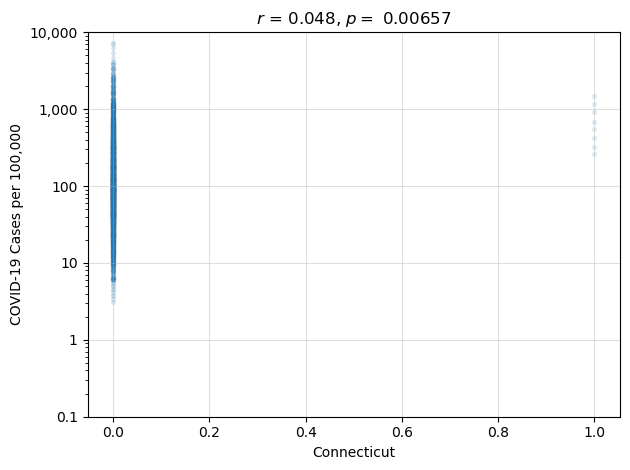

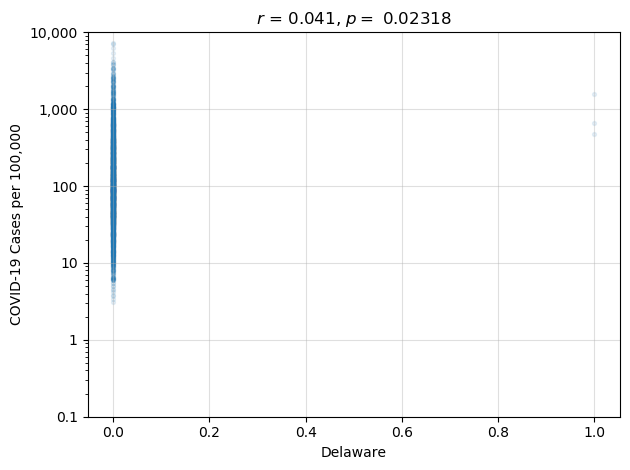

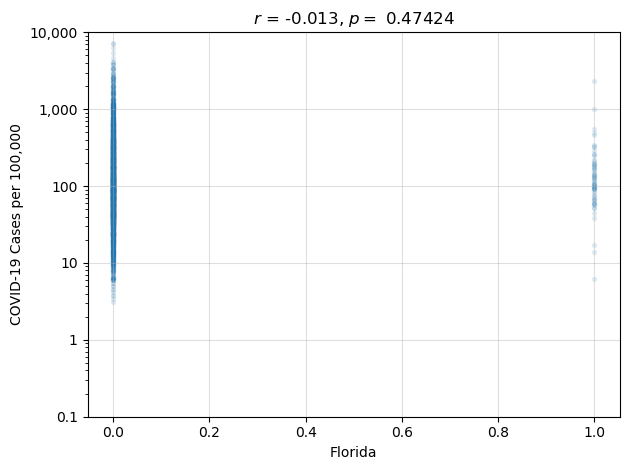

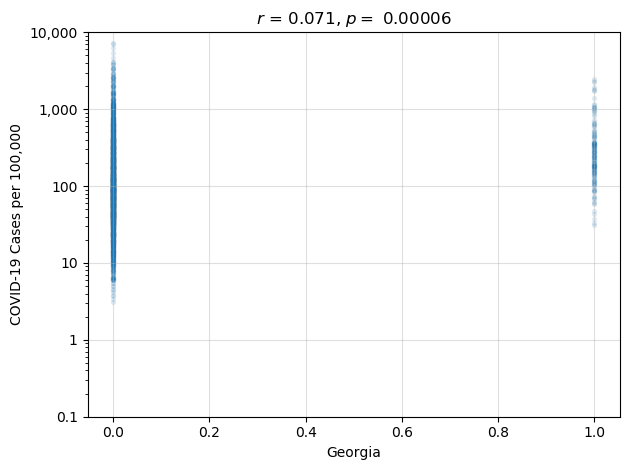

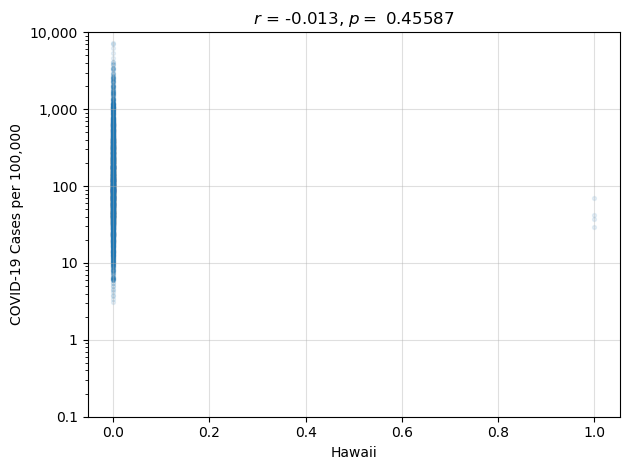

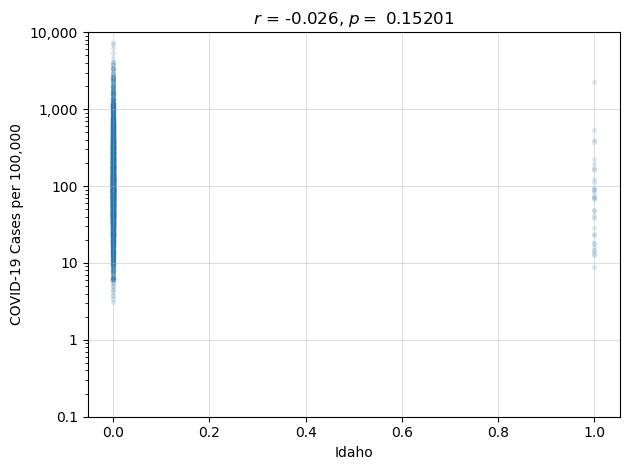

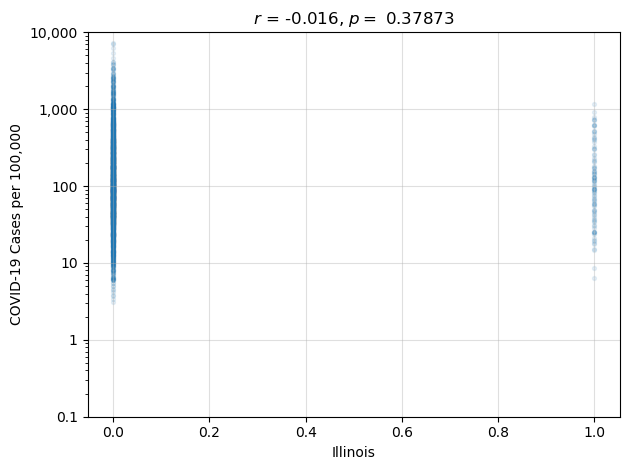

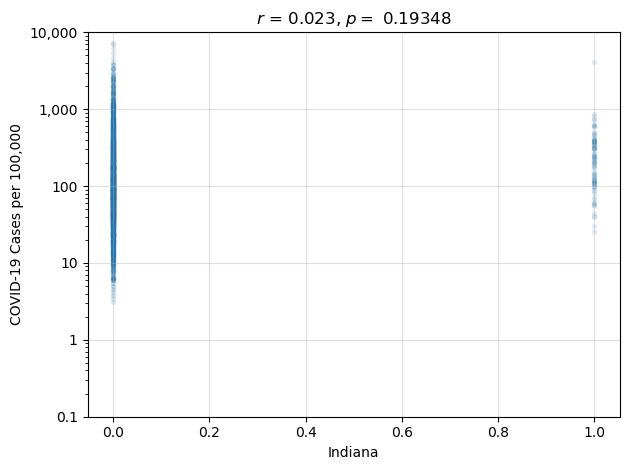

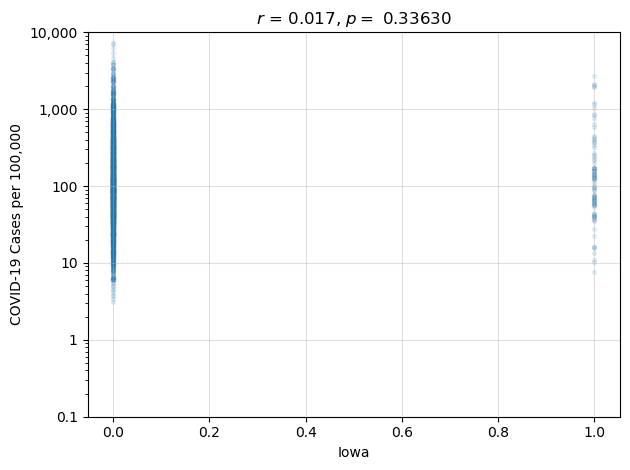

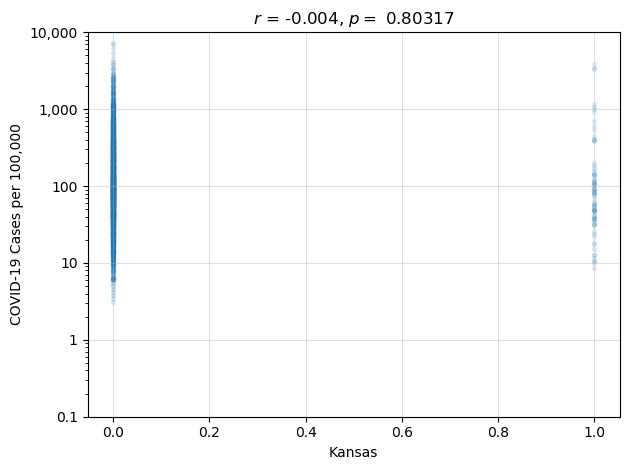

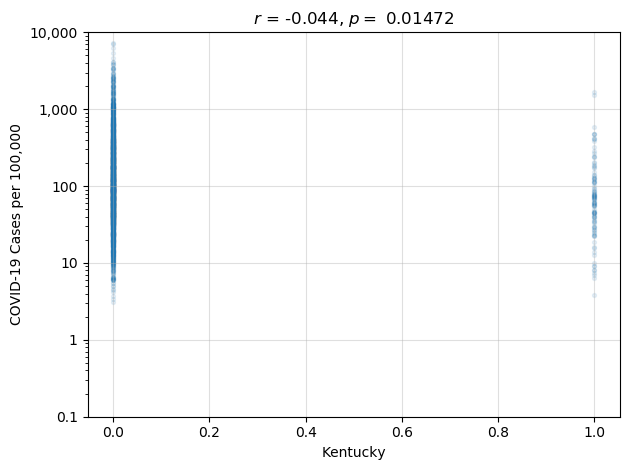

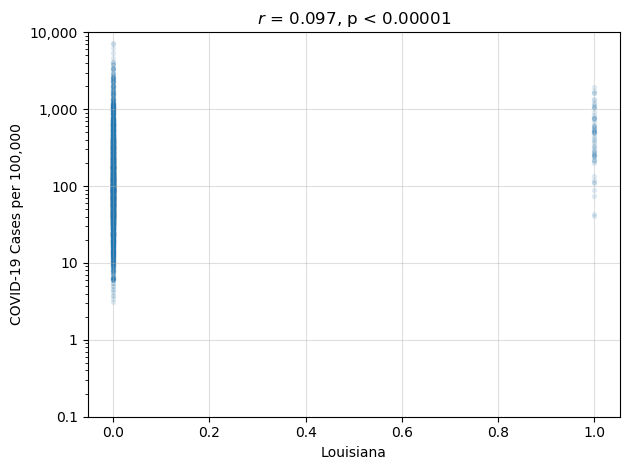

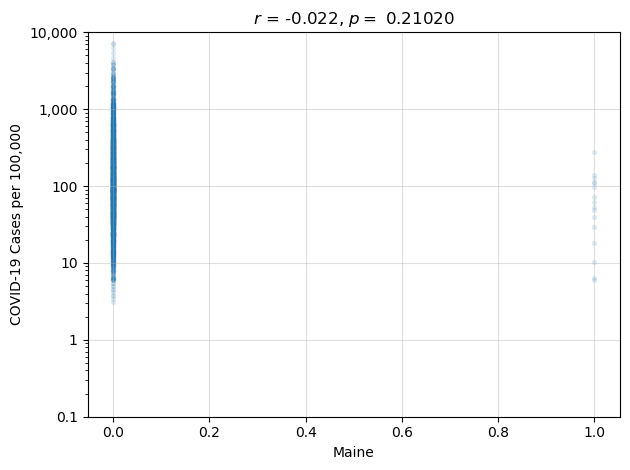

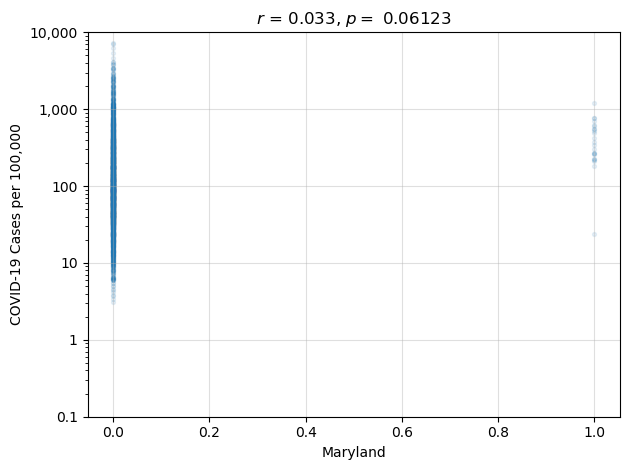

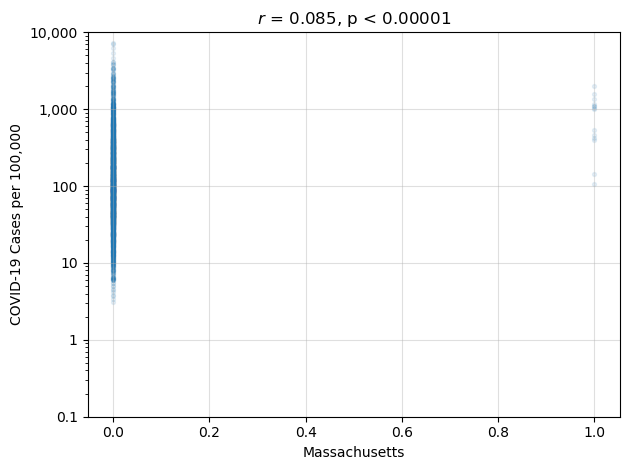

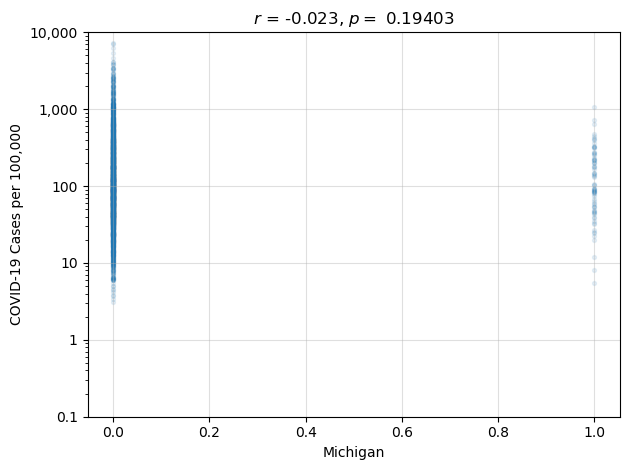

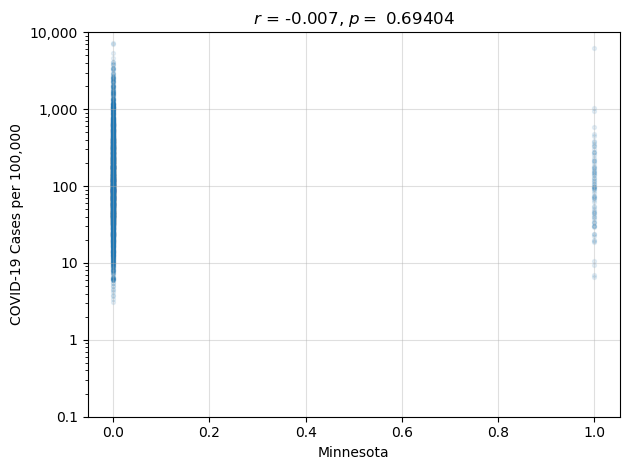

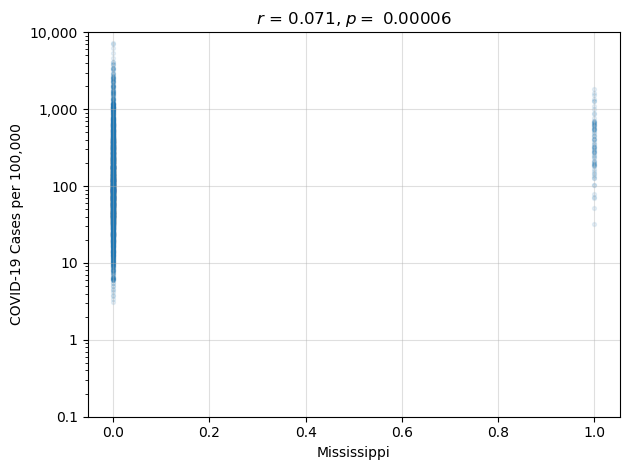

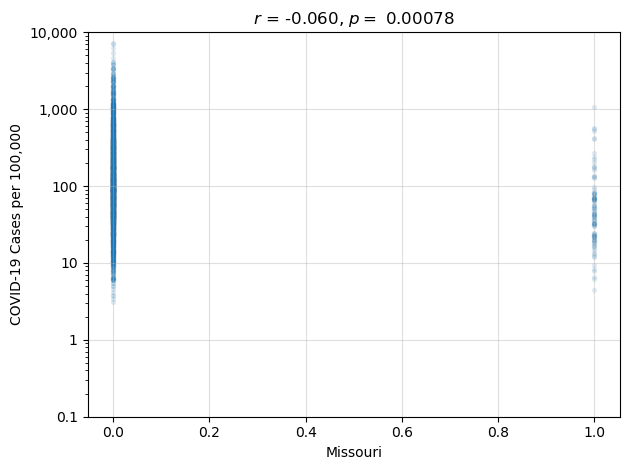

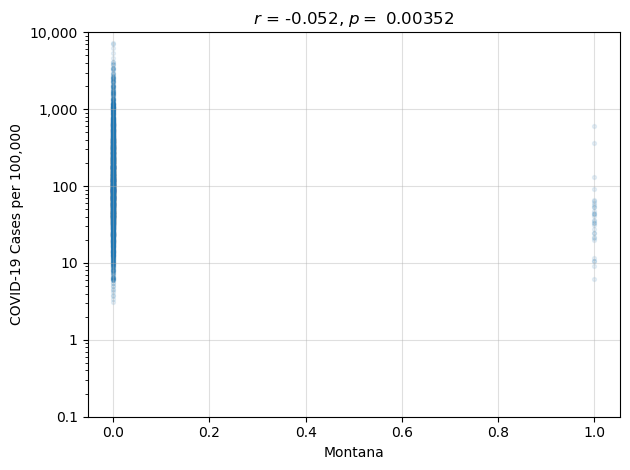

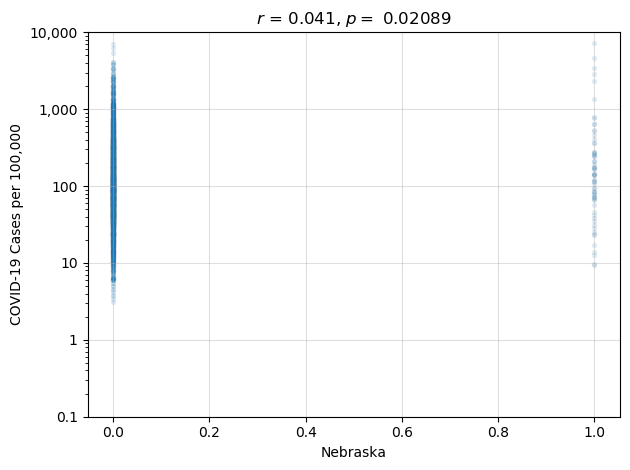

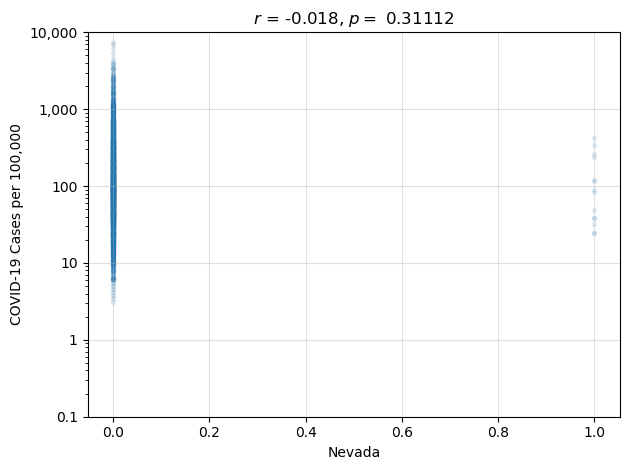

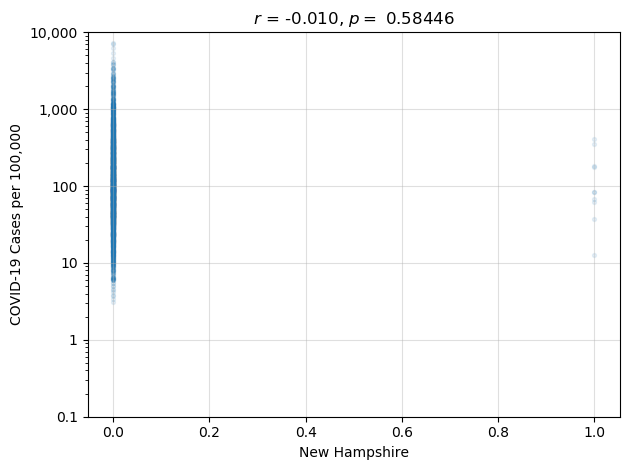

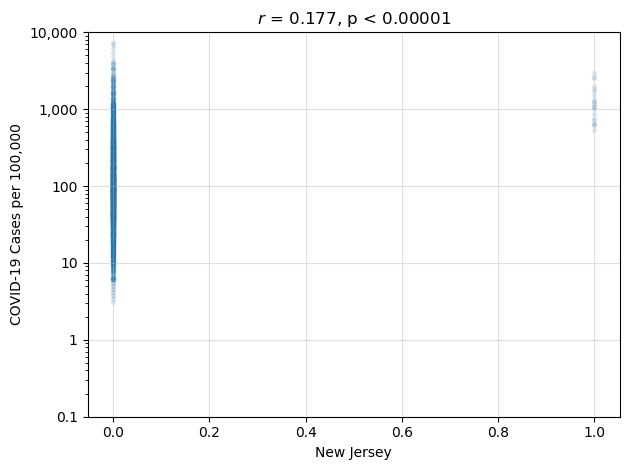

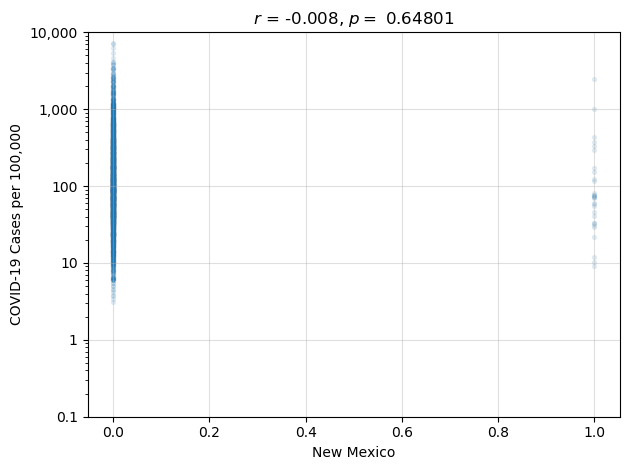

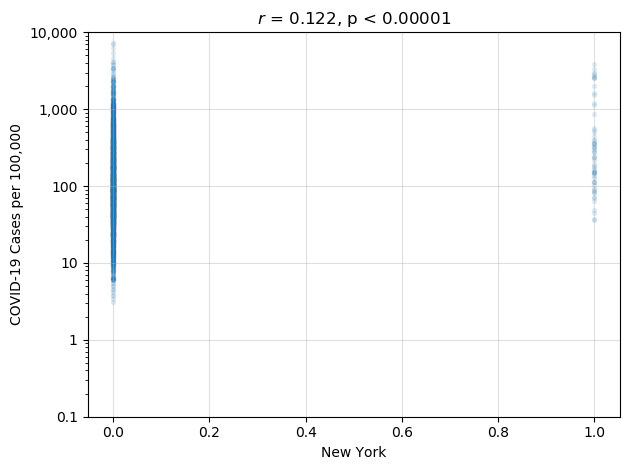

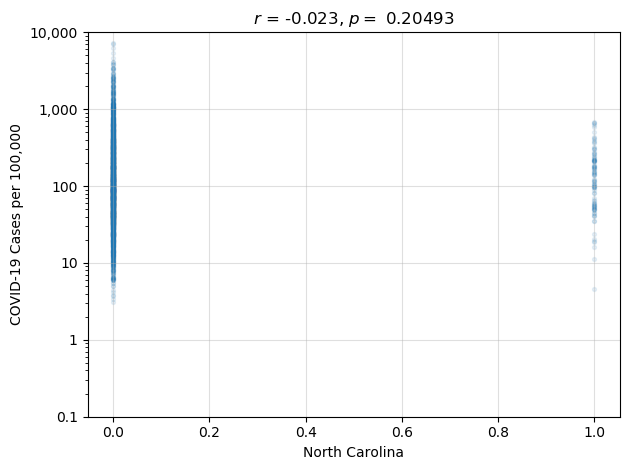

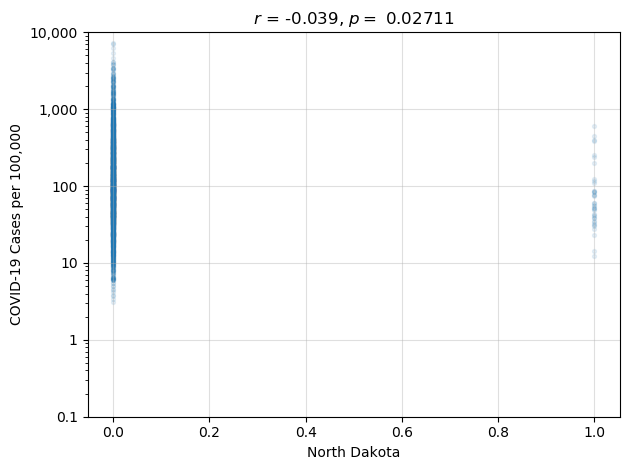

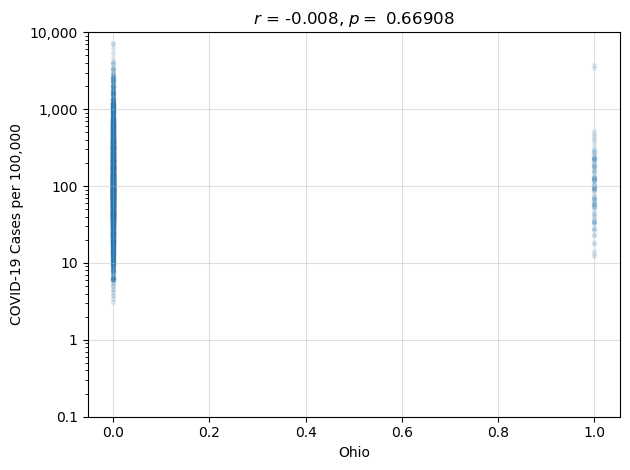

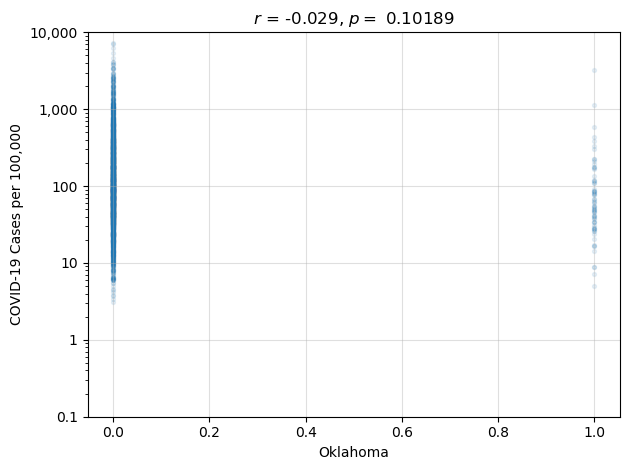

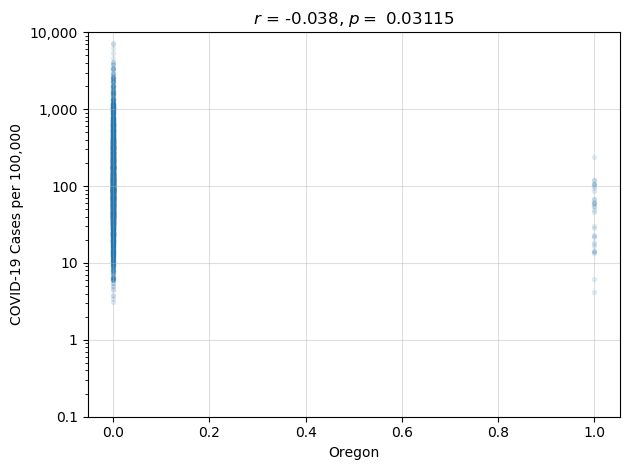

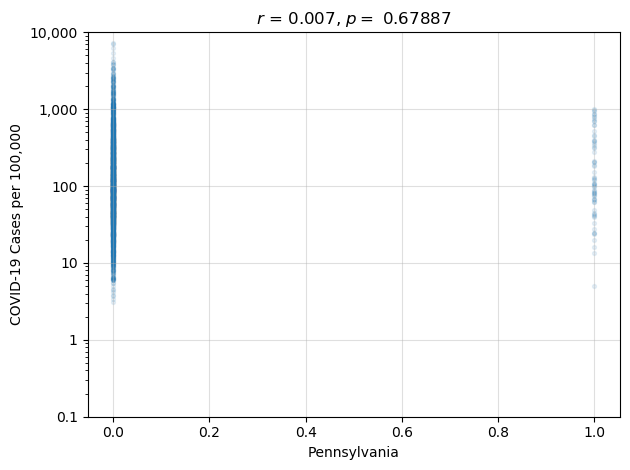

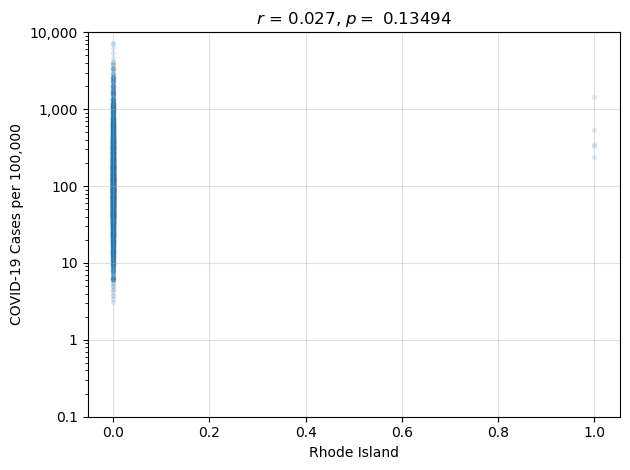

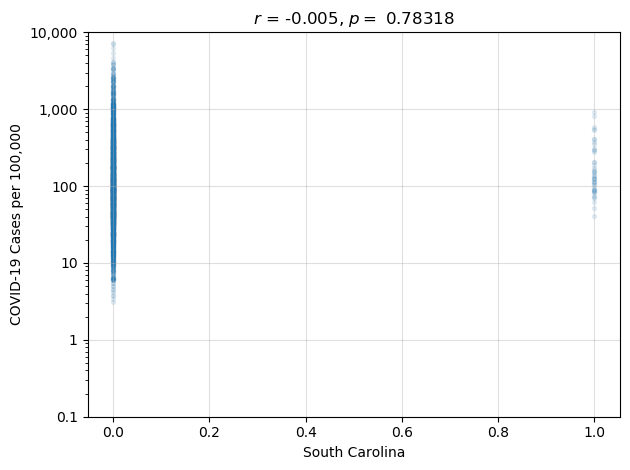

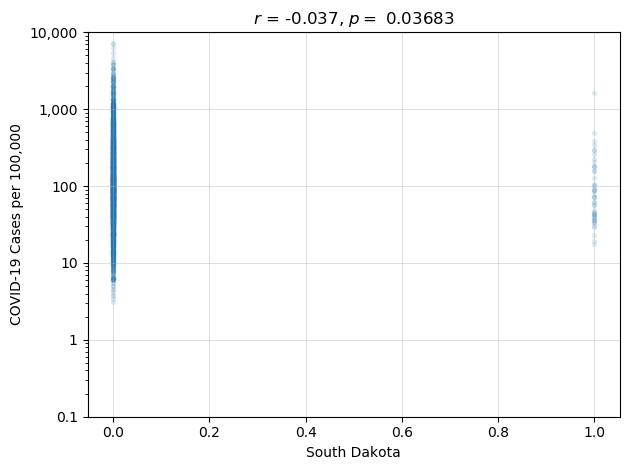

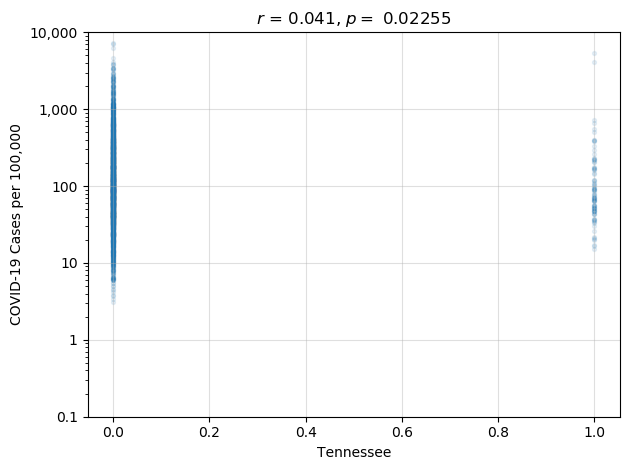

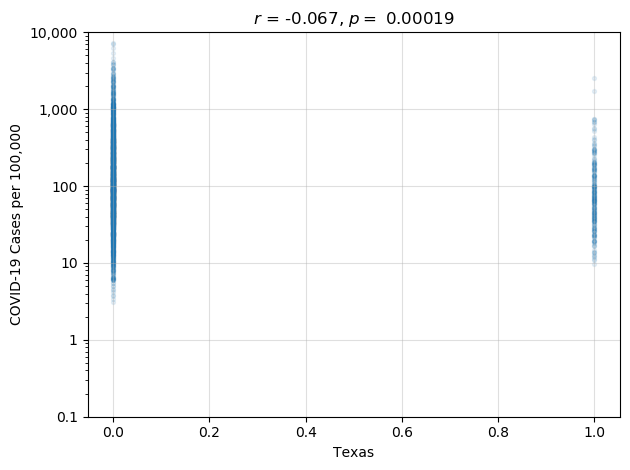

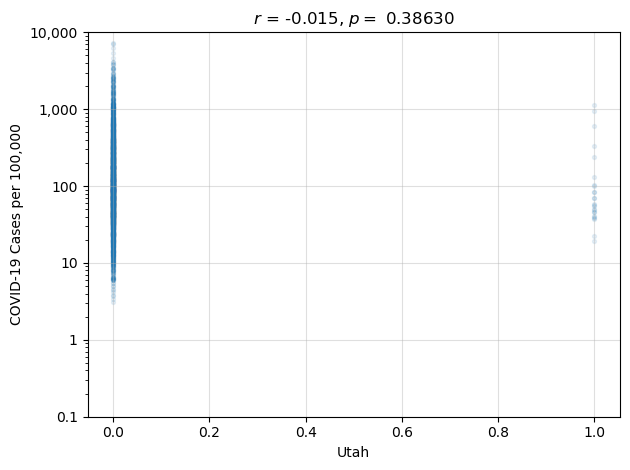

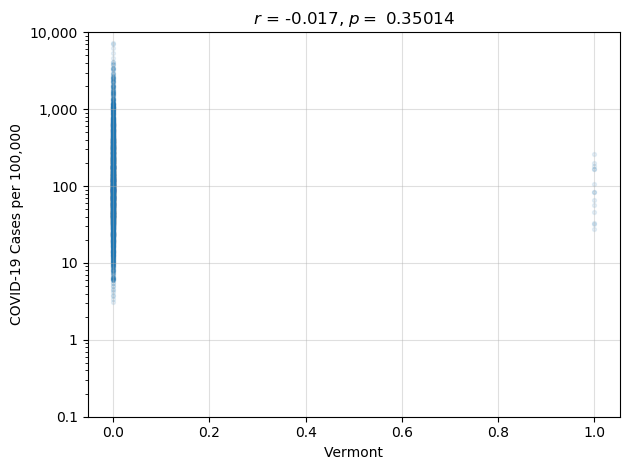

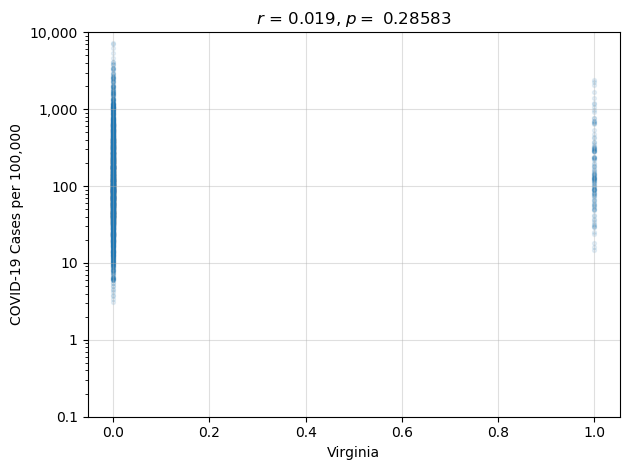

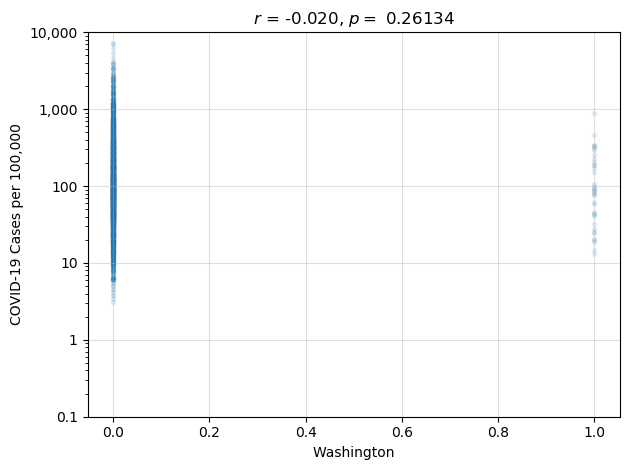

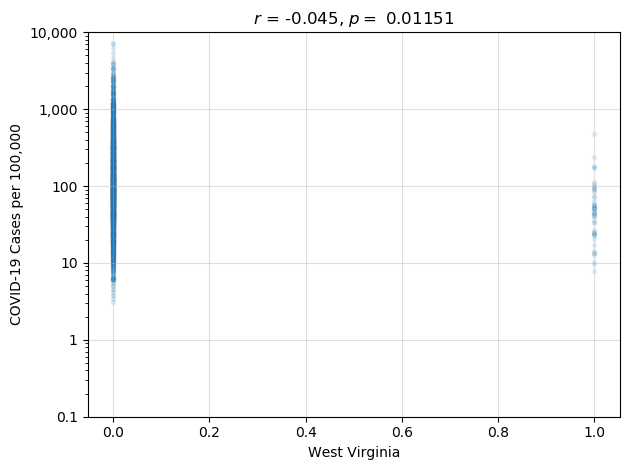

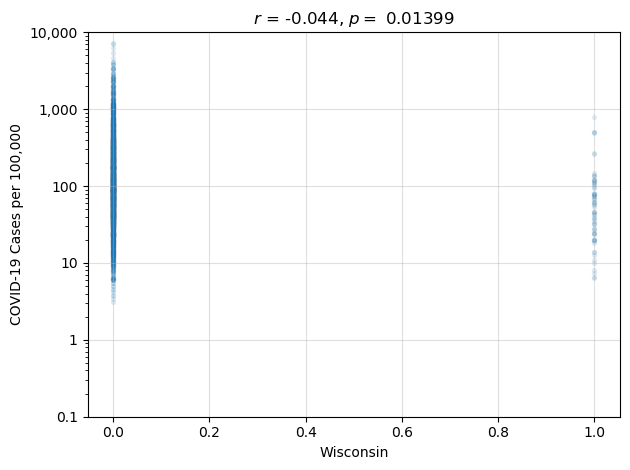

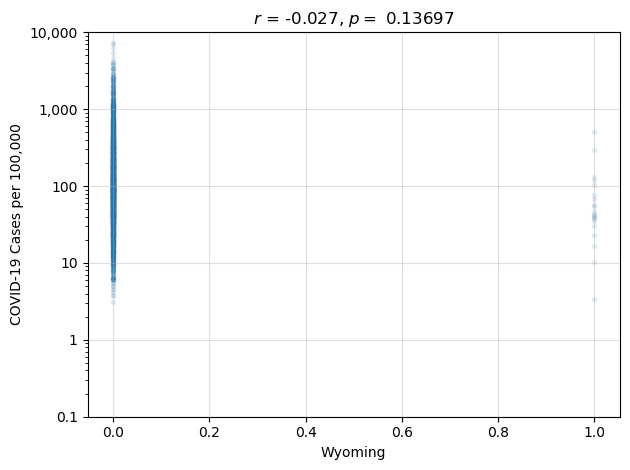

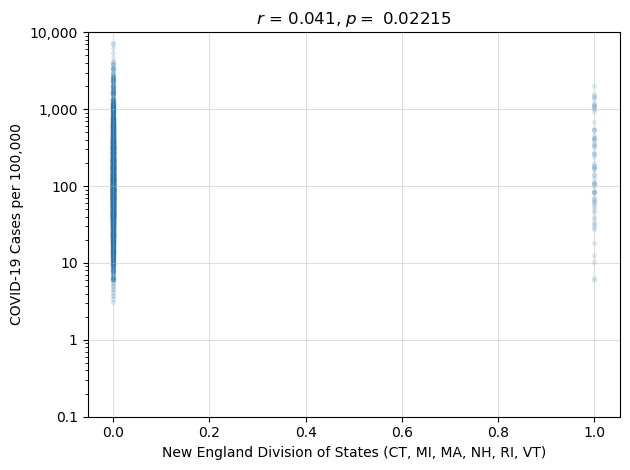

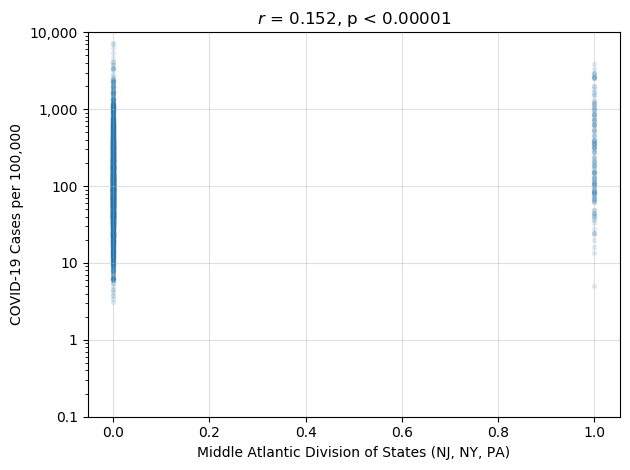

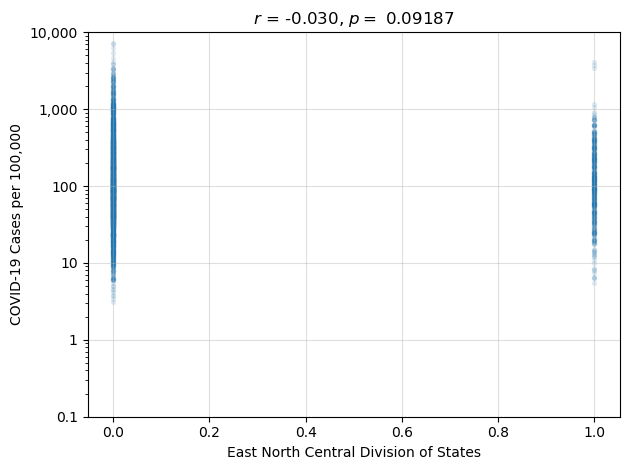

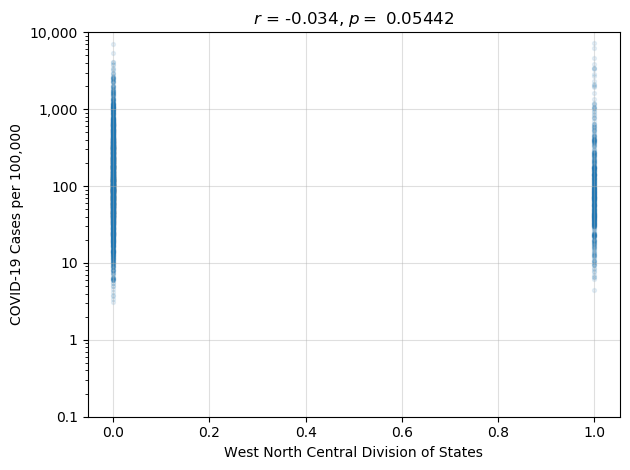

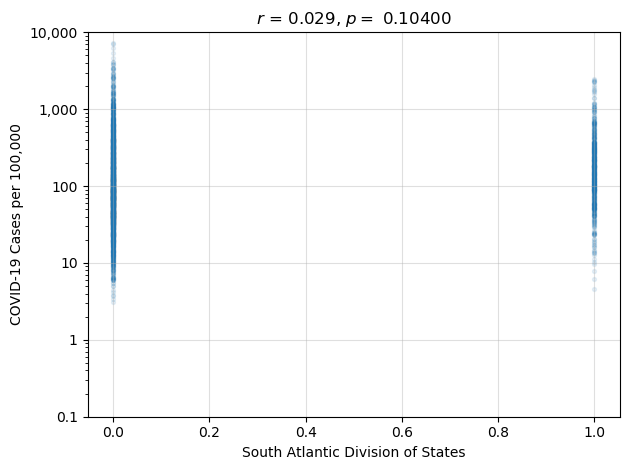

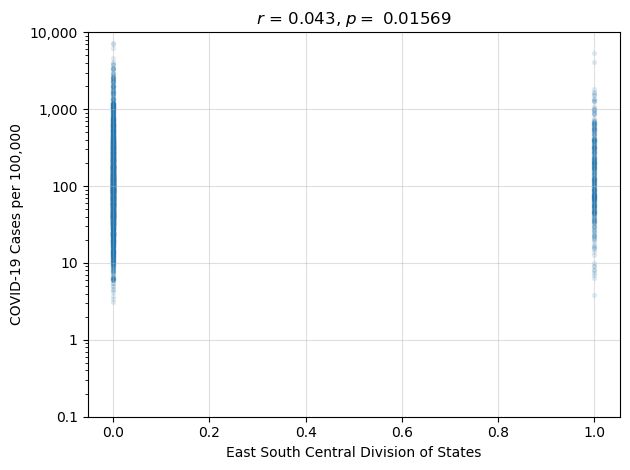

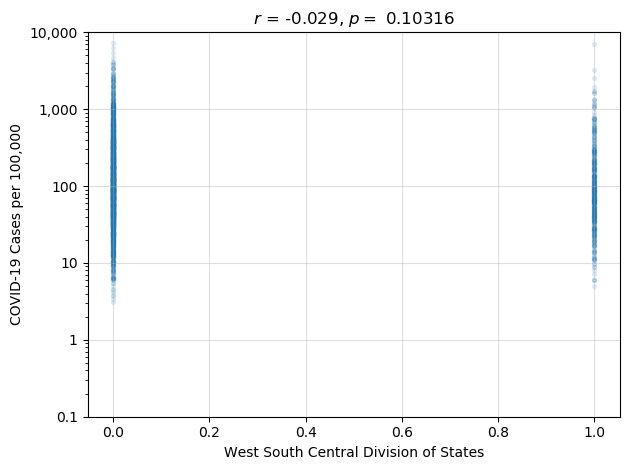

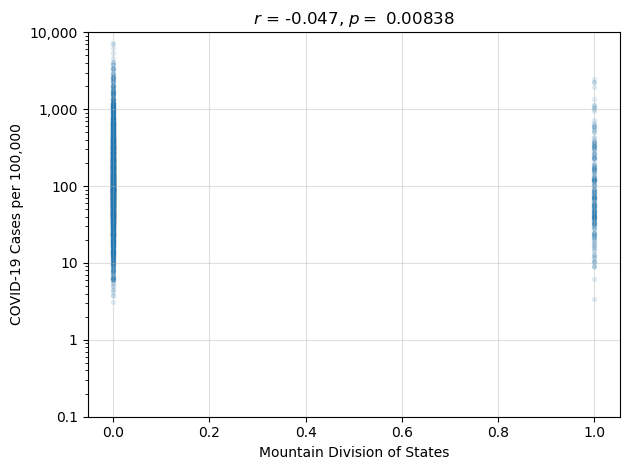

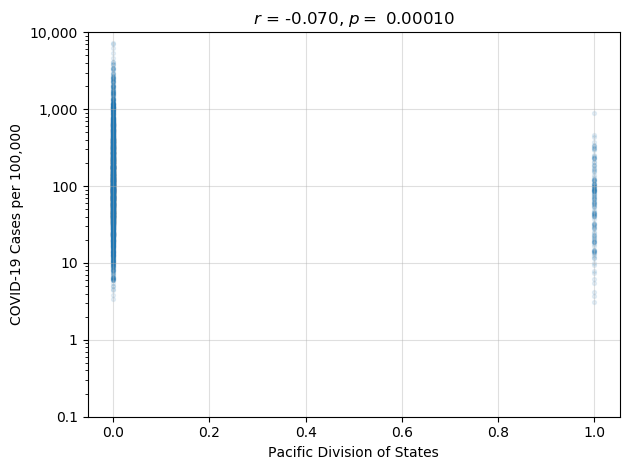

In [336]:
for i in range(len(col_list)):
    col = col_list[i]
    plot_r2(df, col, df.CPC)
    plt.savefig('plots/correlations/'+ str(i) + '_' + str(col) + '.png', dpi=250)
    plt.show()